KeyboardInterrupt: 

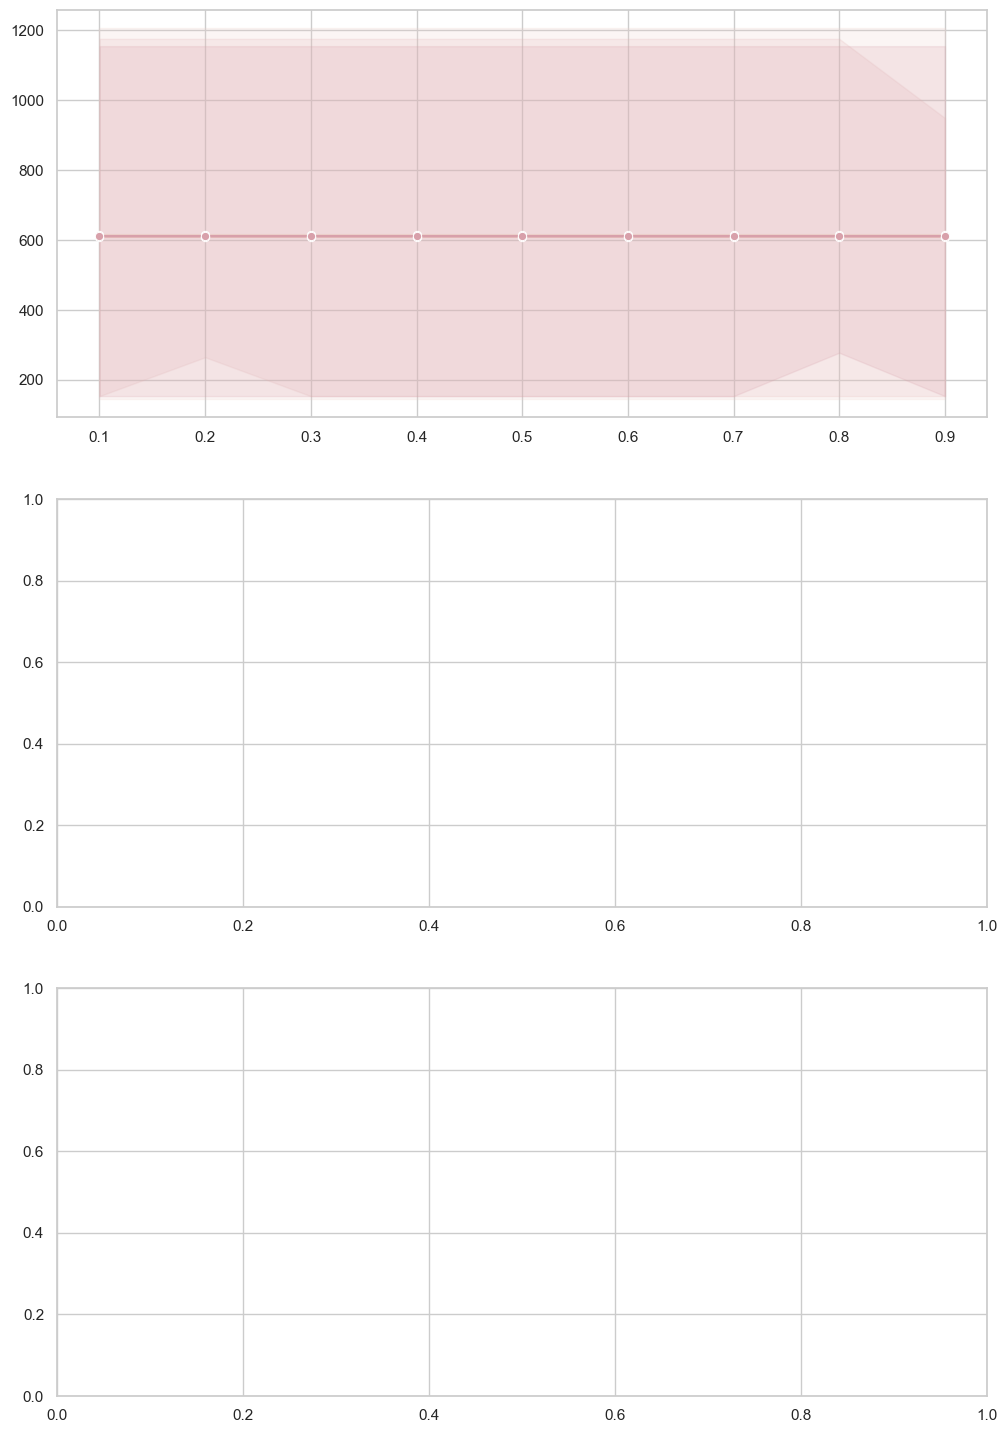

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 로드
file_path = './simulation_results.csv'
df = pd.read_csv(file_path)

# 그래프 스타일 설정
sns.set(style="whitegrid")

# 문제 타입 유일값 추출 (ALPHA_S, ALPHA_E, BETA 기준)
unique_problem_types = df[['ALPHA_S', 'ALPHA_E', 'BETA']].drop_duplicates()

# 각 문제 타입에 대해 그래프 생성 및 저장
image_files = []

for _, problem in unique_problem_types.iterrows():
    # 특정 문제 타입의 데이터 추출
    problem_df = df[(df['ALPHA_S'] == problem['ALPHA_S']) & 
                    (df['ALPHA_E'] == problem['ALPHA_E']) & 
                    (df['BETA'] == problem['BETA'])]
    
    # 그래프 생성
    fig, axs = plt.subplots(3, 1, figsize=(12, 18))

    for i, metric in enumerate(['MEAN TARDINESS', 'TARDY JOB', 'Q TARDY JOB']):
        sns.lineplot(
            data=problem_df, 
            x='K', 
            y=metric, 
            hue='SEED', 
            ax=axs[i], 
            marker='o'
        )
        
        axs[i].set_title(f'{metric} vs K (ALPHA_S={problem["ALPHA_S"]}, ALPHA_E={problem["ALPHA_E"]}, BETA={problem["BETA"]})')
        axs[i].set_xlabel('K')
        axs[i].set_ylabel(metric)

    # 레이아웃 조정
    plt.tight_layout()
    
    # 그래프 저장
    # image_file = f'./problem_{problem["ALPHA_S"]}_{problem["ALPHA_E"]}_{problem["BETA"]}.png'
    # fig.savefig(image_file)
    # image_files.append(image_file)
    plt.show()
    plt.close(fig)

# 생성된 이미지 파일 목록
image_files


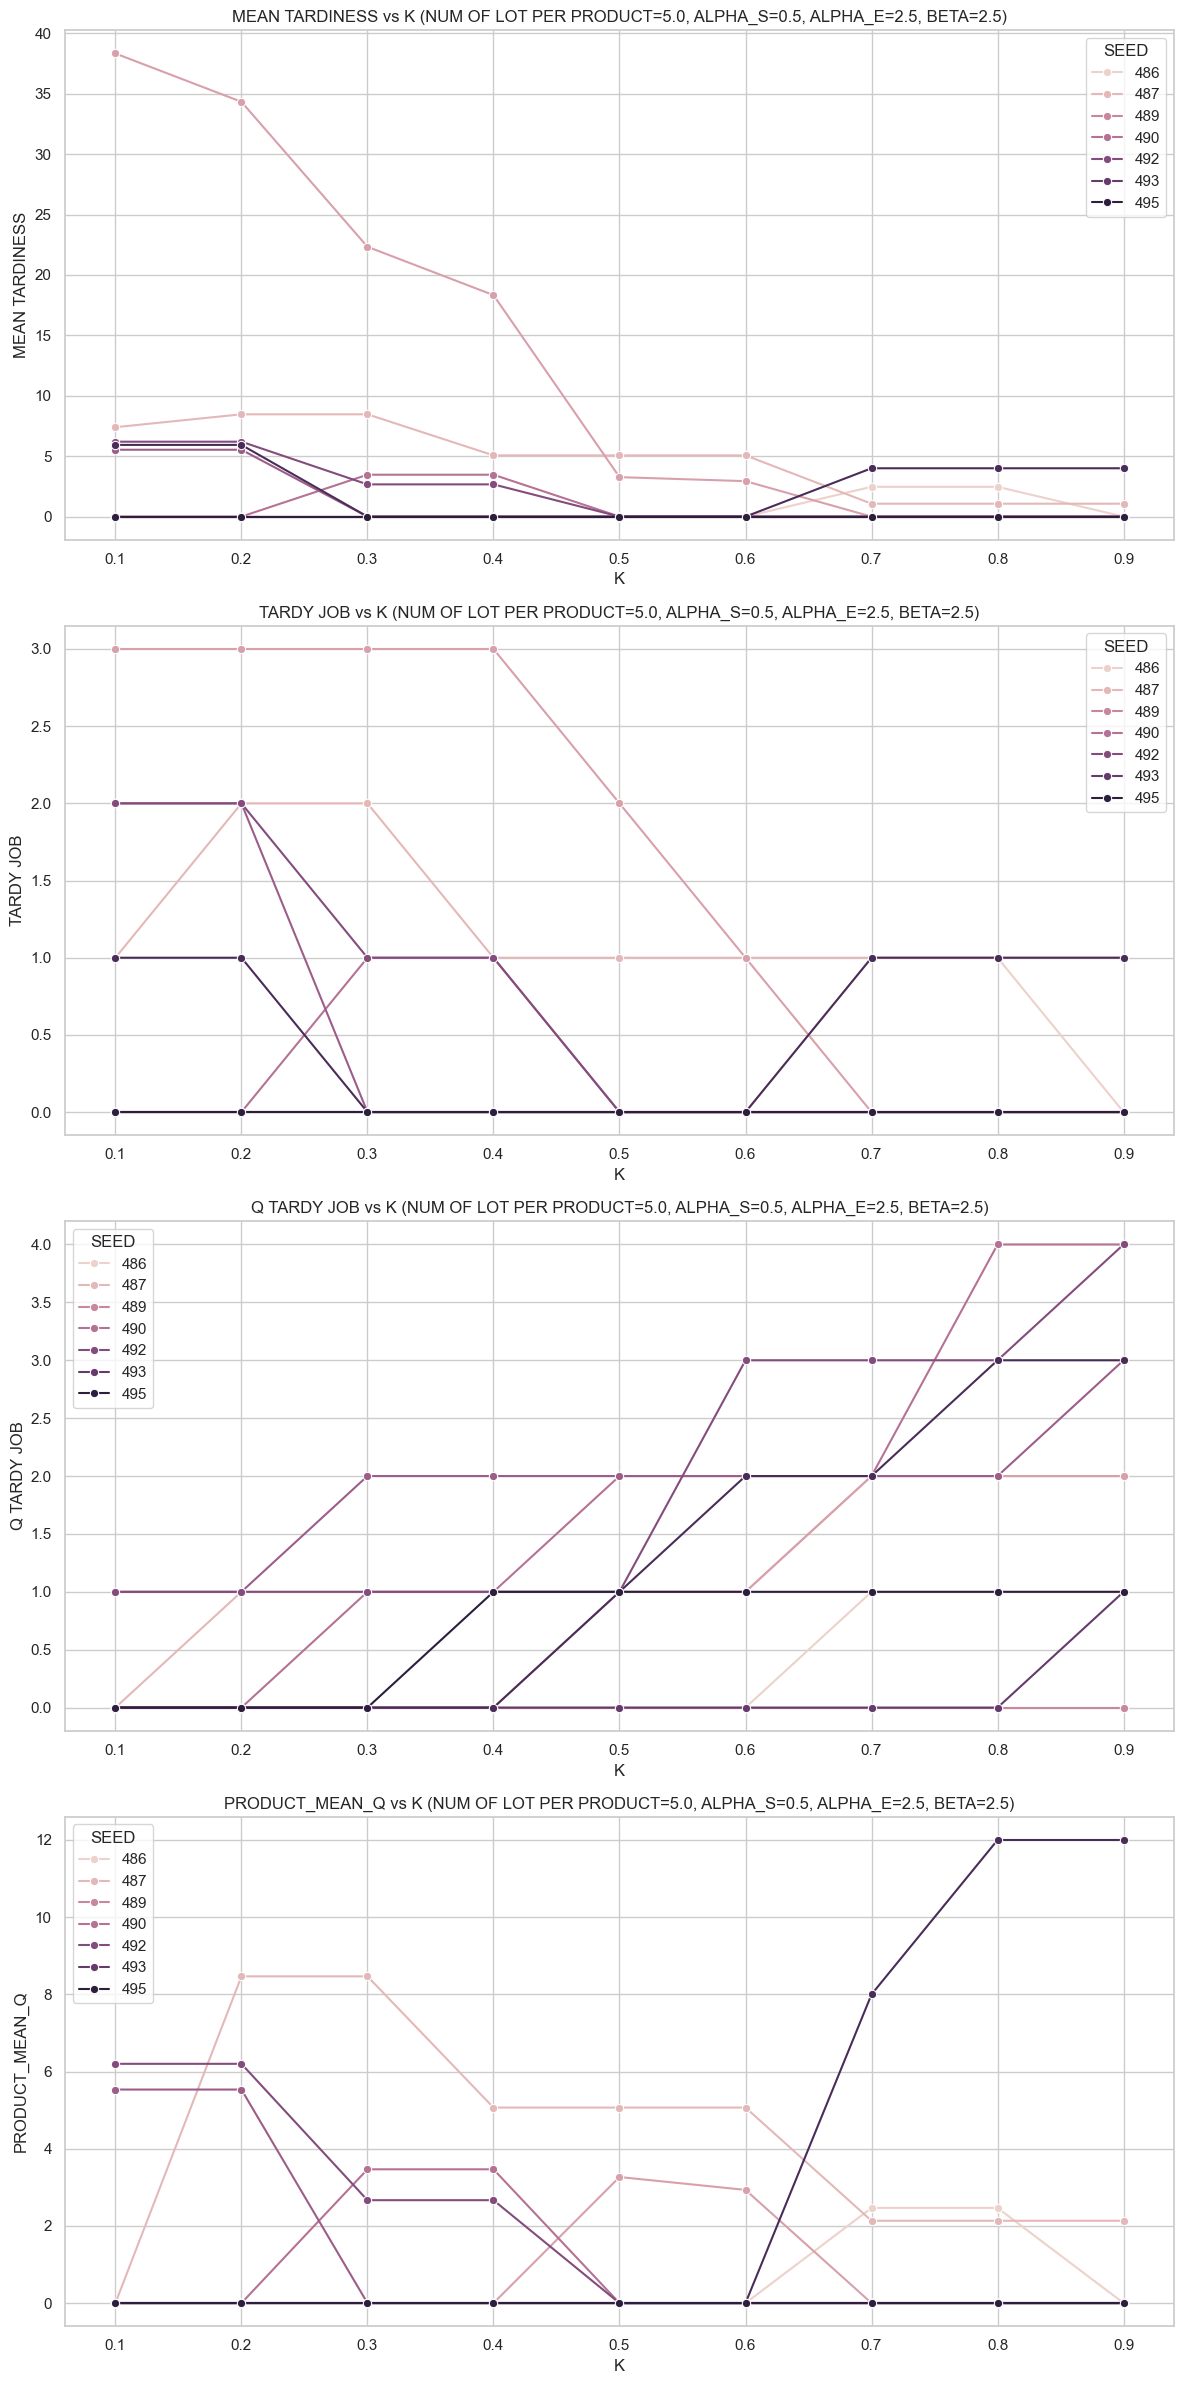

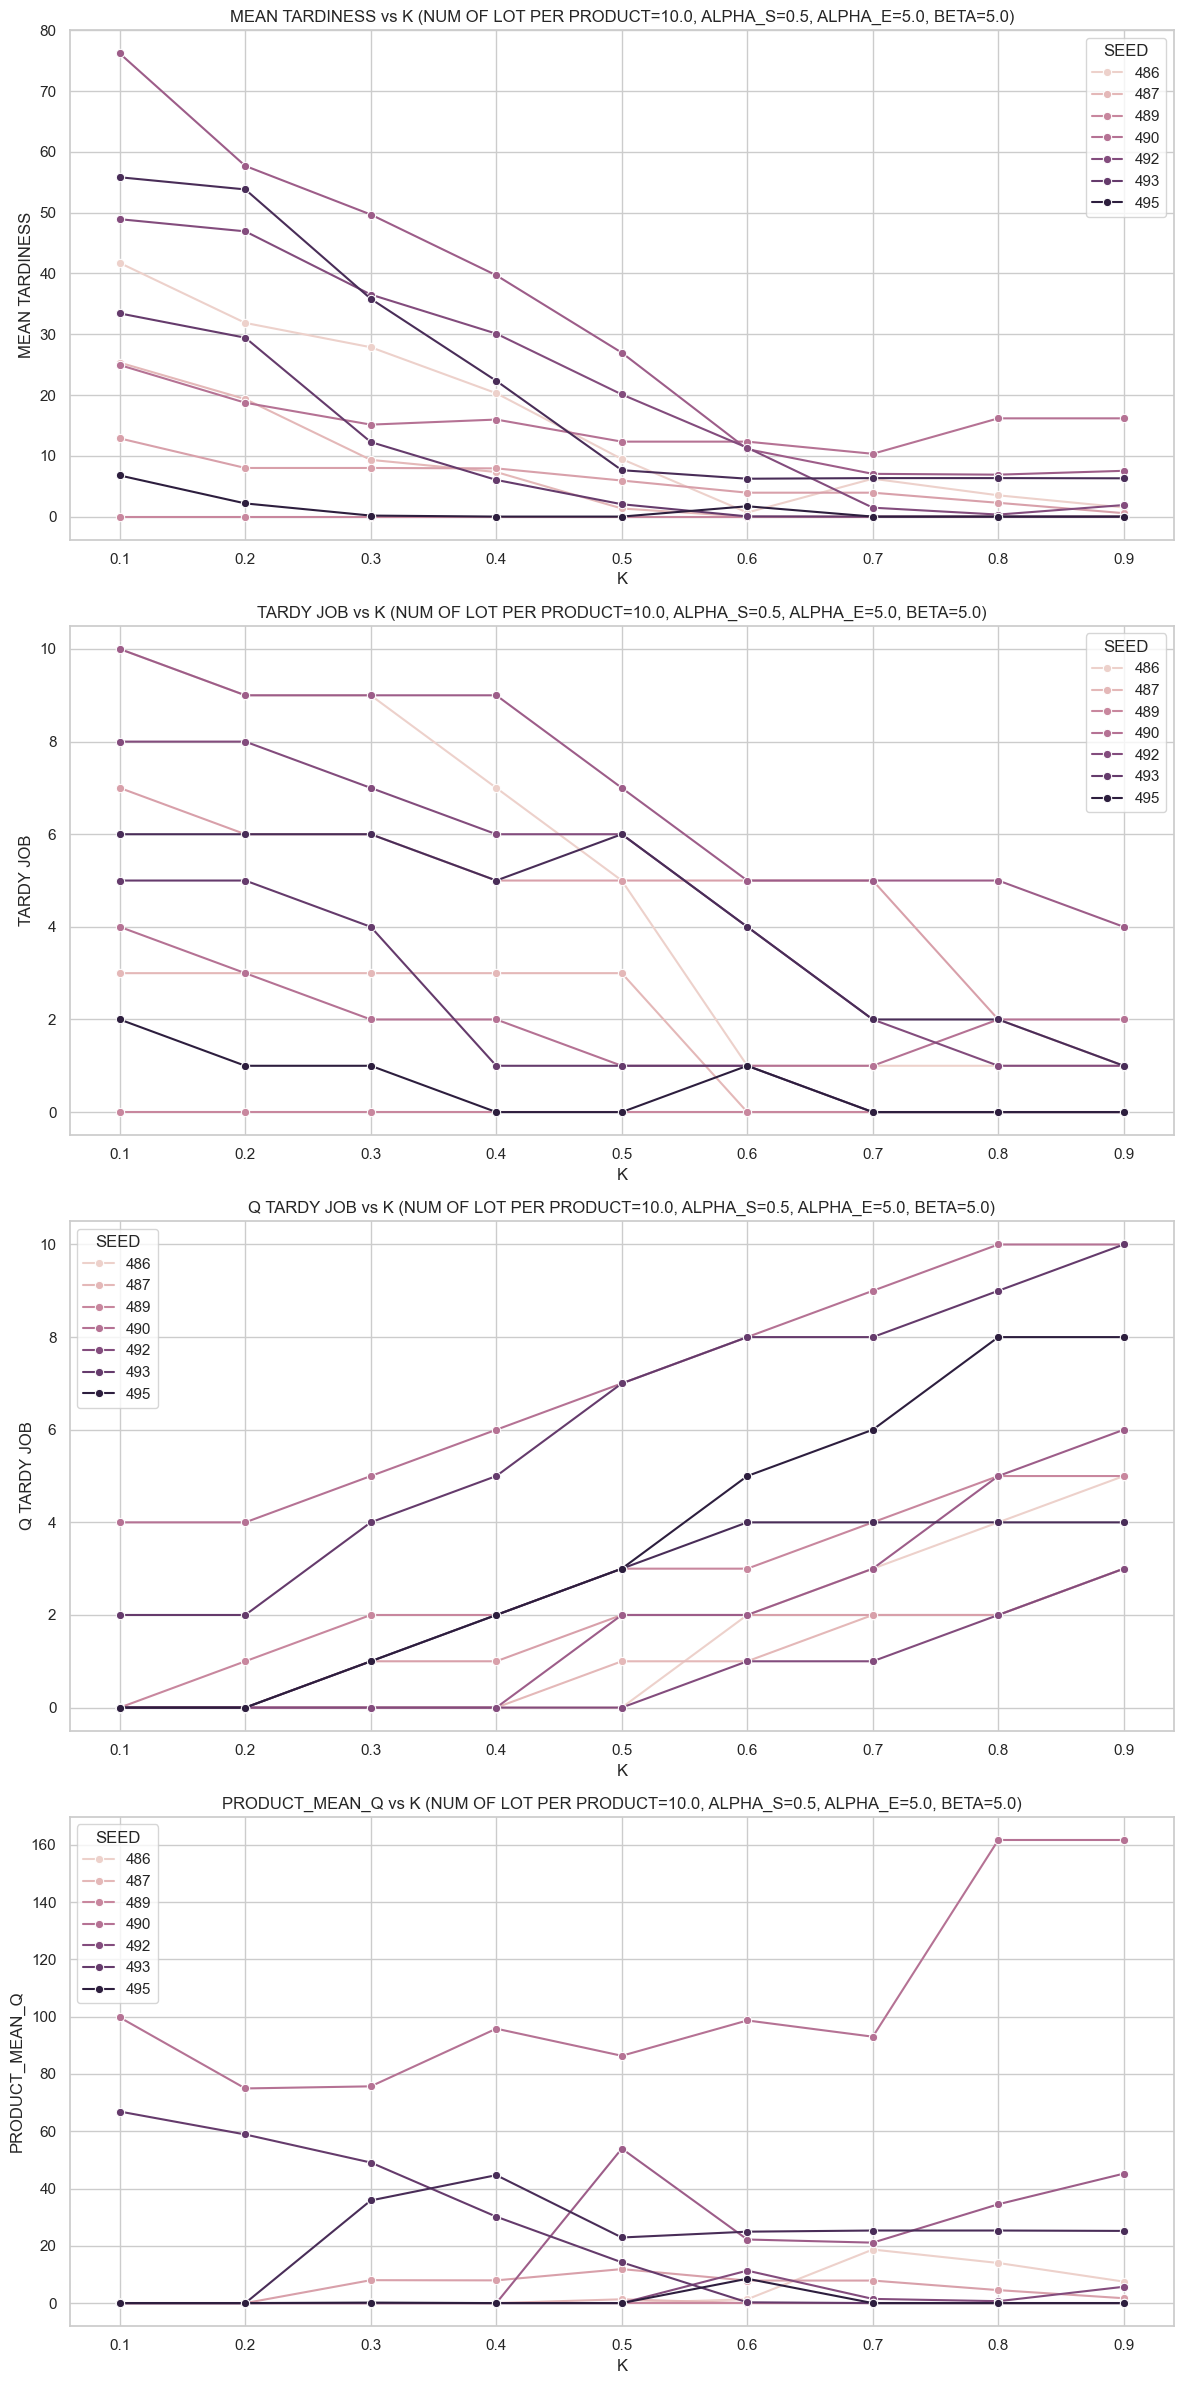

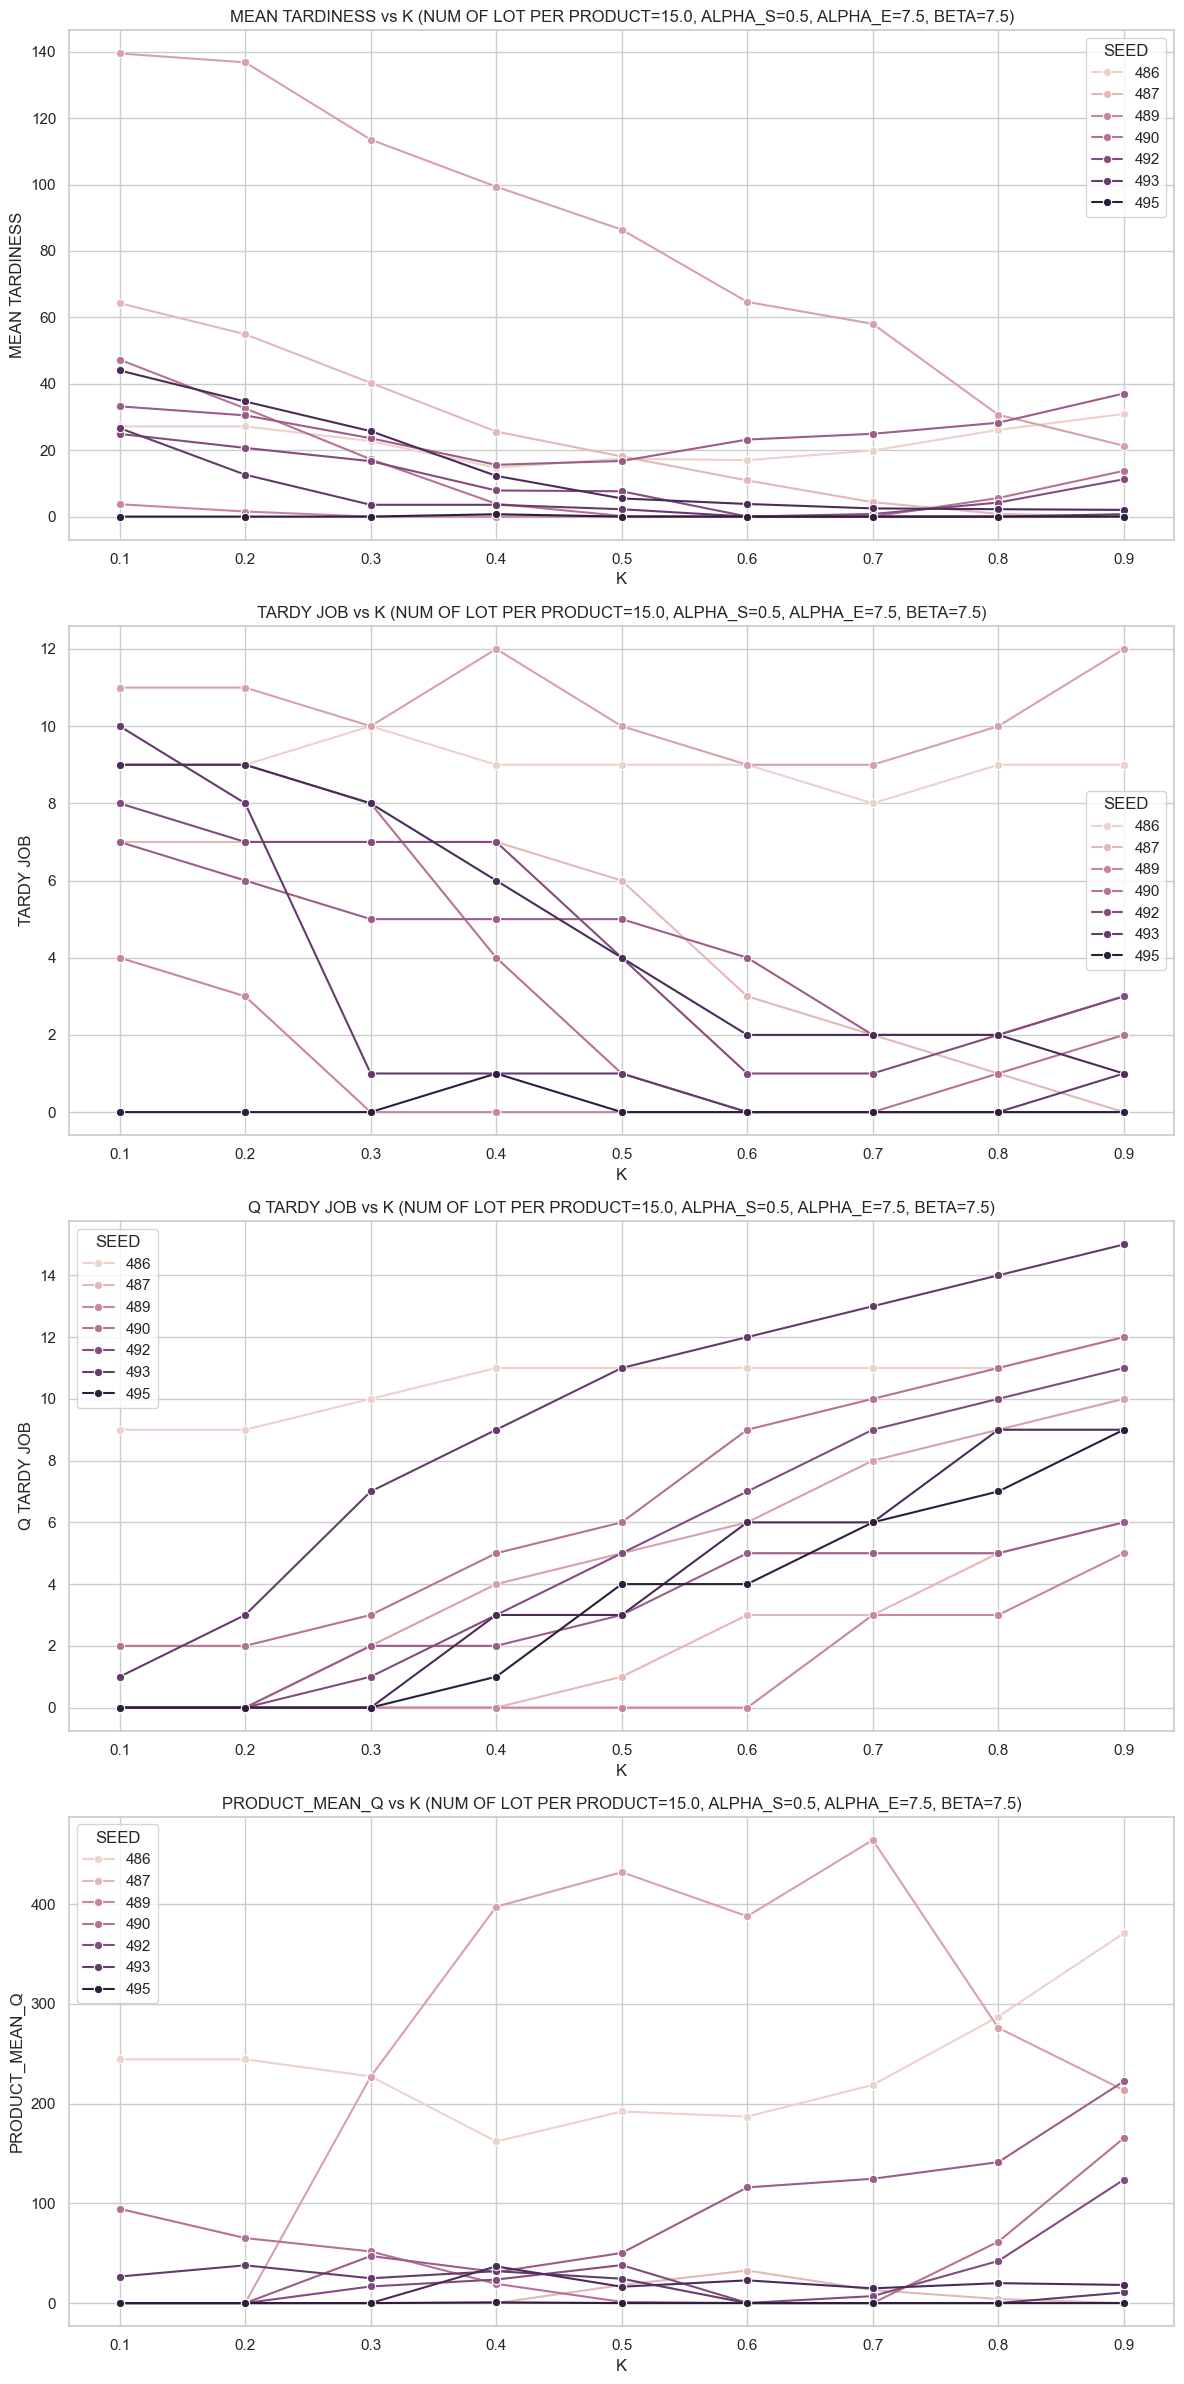

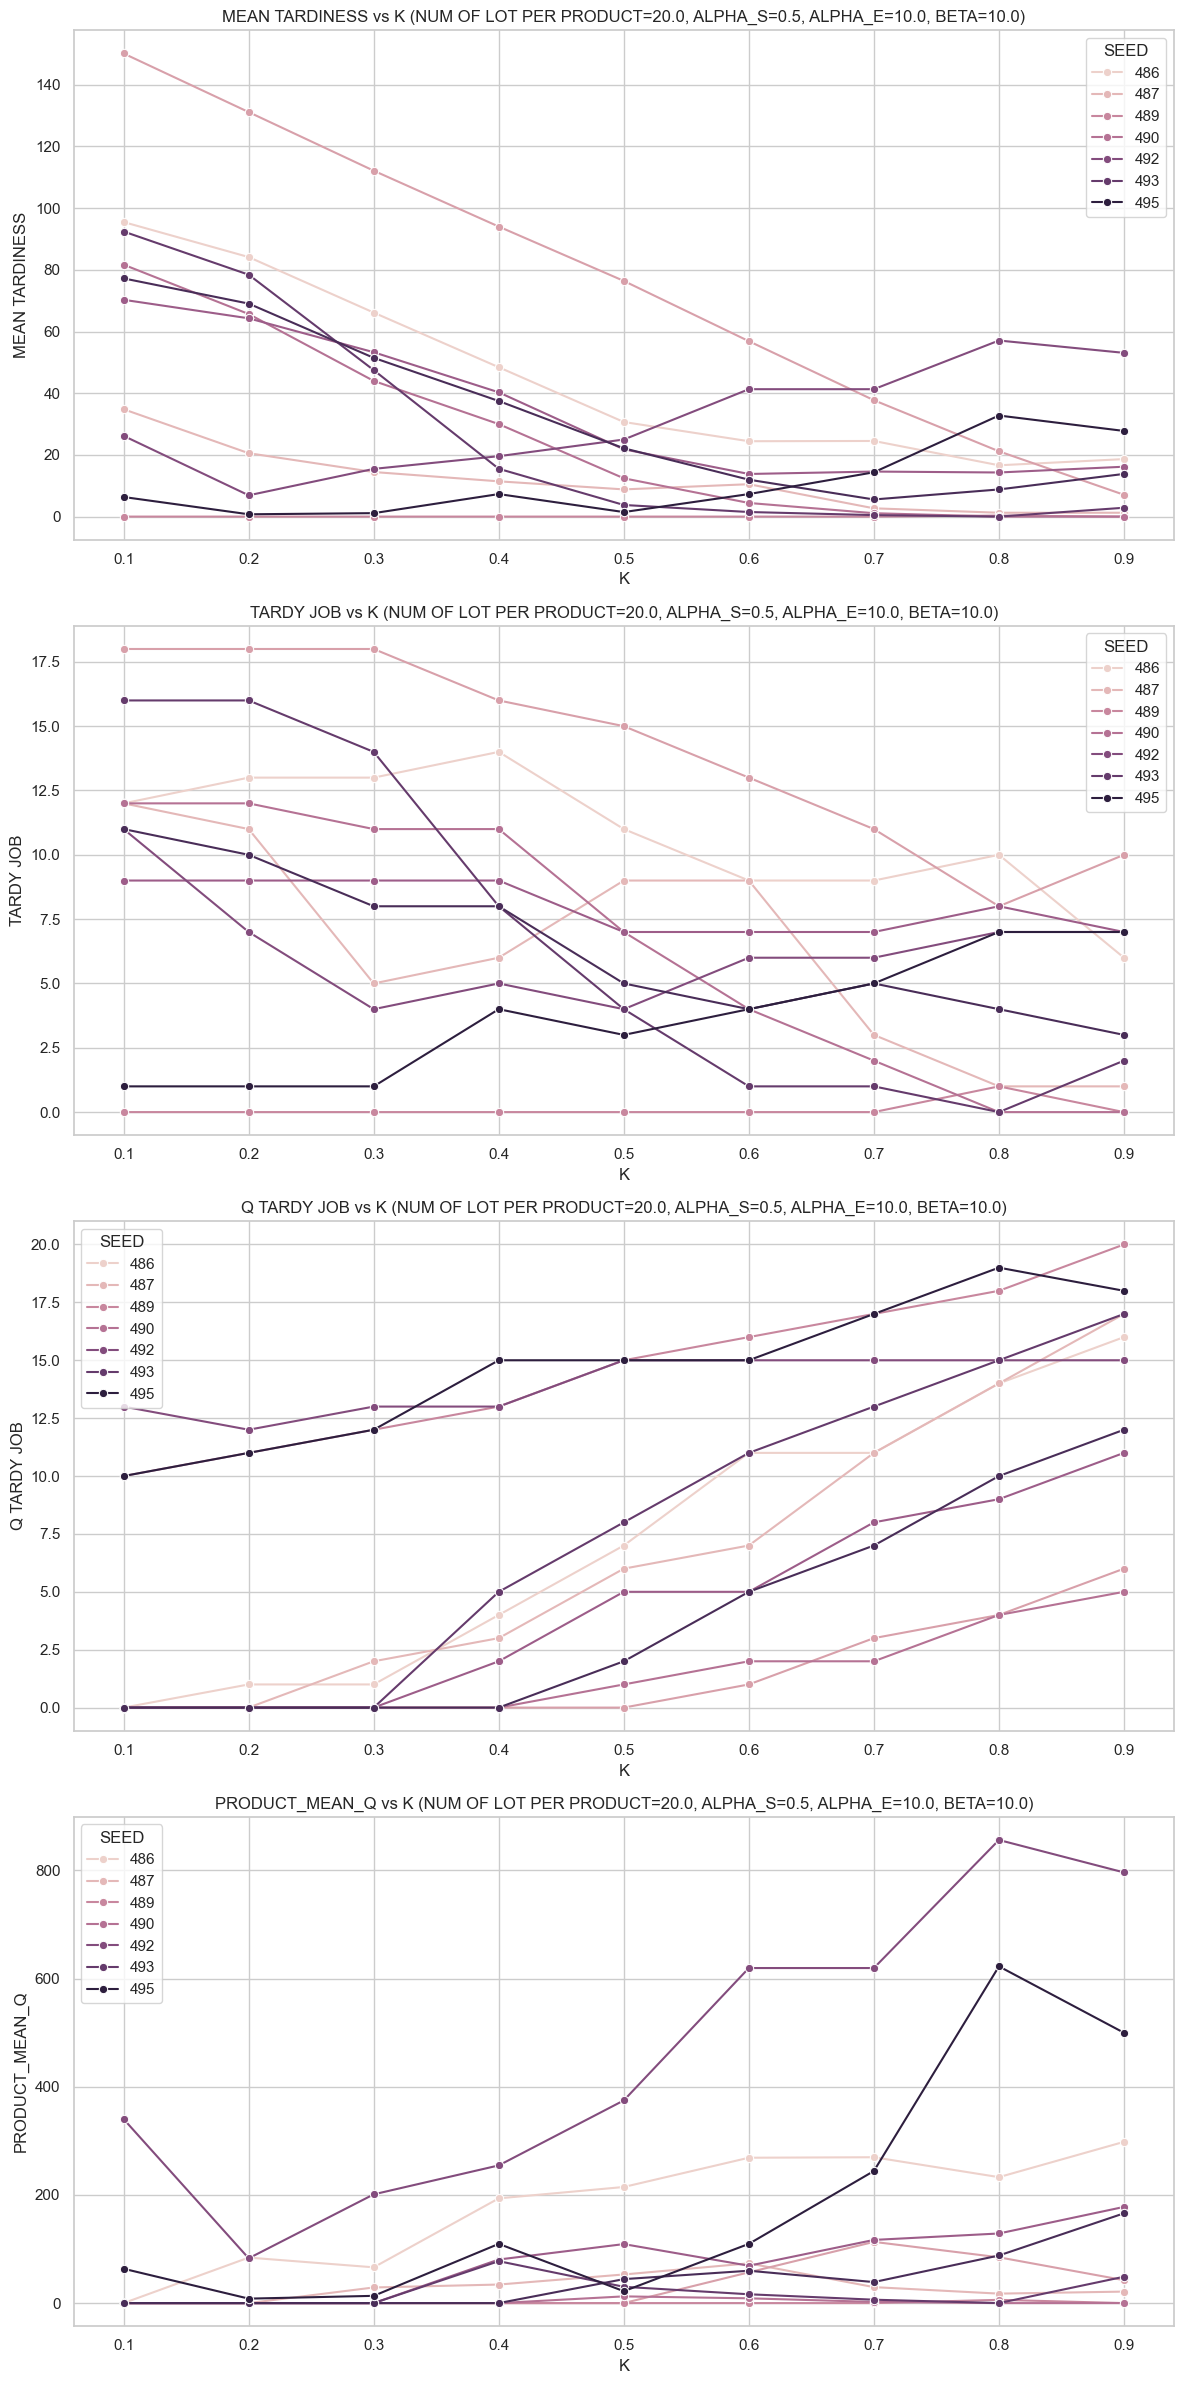

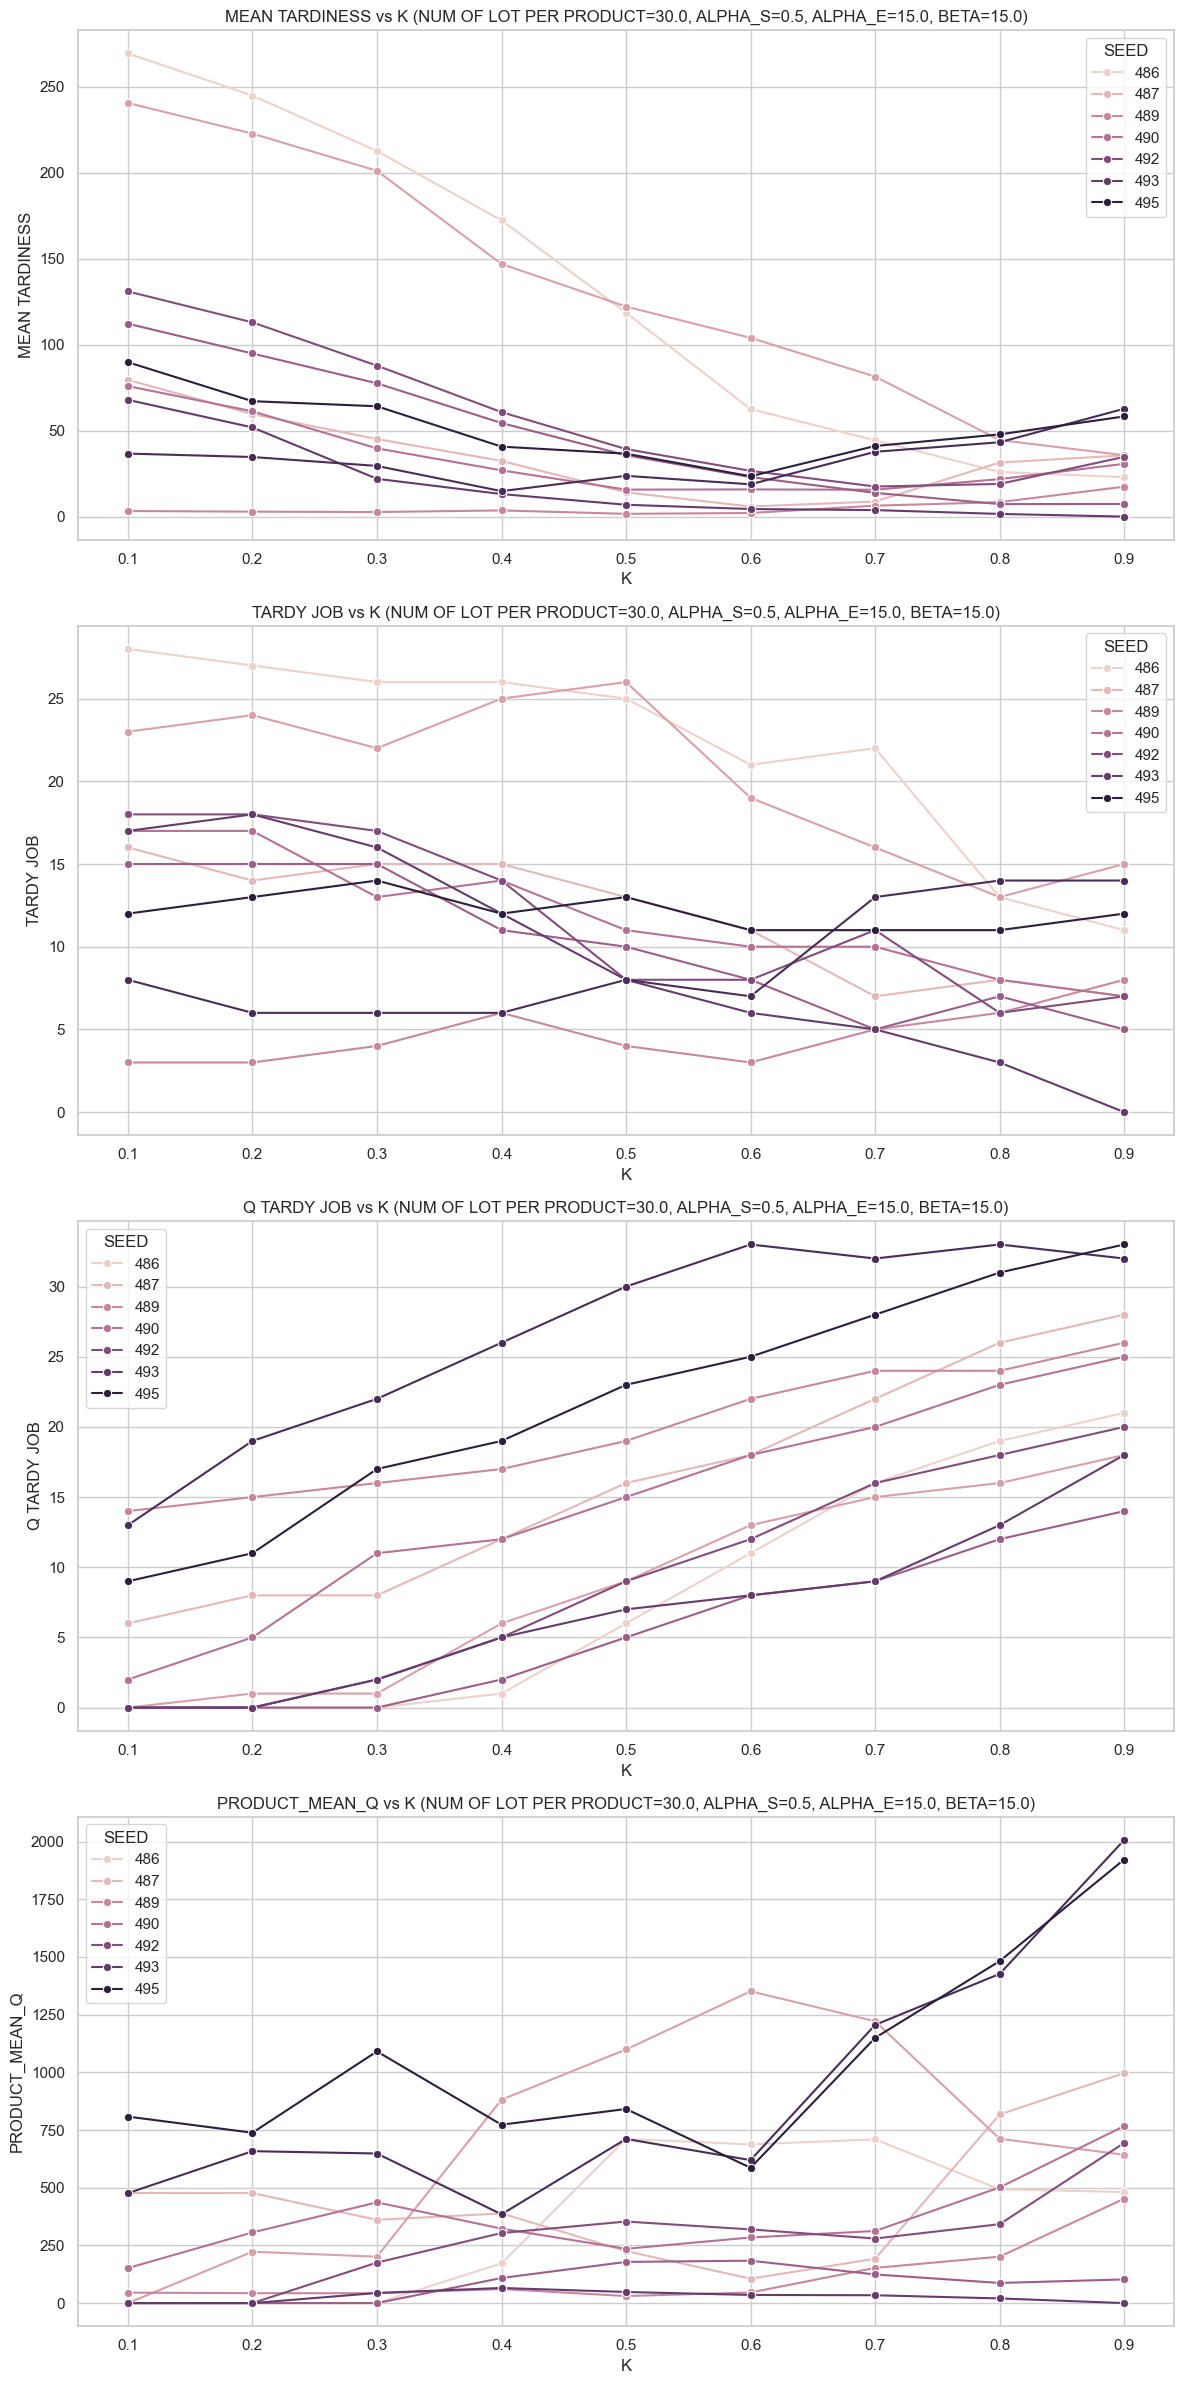

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./simulation_results-2024-06-06.csv")

# Set the style of the visualization


# Create a new column for the product of Mean Tardiness and Q Tardy Job
df['PRODUCT_MEAN_Q'] = df['MEAN TARDINESS'] * df['Q TARDY JOB']

# Set the style of the visualization
sns.set(style="whitegrid")

# Unique problem types based on NUM OF LOT PER PRODUCT, ALPHA_S, ALPHA_E, and BETA
unique_problem_types = df[['NUM OF LOT PER PRODUCT', 'ALPHA_S', 'ALPHA_E', 'BETA']].drop_duplicates()

# Plotting for each problem type in separate figures
for _, problem in unique_problem_types.iterrows():
    problem_df = df[(df['NUM OF LOT PER PRODUCT'] == problem['NUM OF LOT PER PRODUCT']) & 
                    (df['ALPHA_S'] == problem['ALPHA_S']) & 
                    (df['ALPHA_E'] == problem['ALPHA_E']) & 
                    (df['BETA'] == problem['BETA'])]
    
    fig, axs = plt.subplots(4, 1, figsize=(12, 24))

    metrics = ['MEAN TARDINESS', 'TARDY JOB', 'Q TARDY JOB', 'PRODUCT_MEAN_Q']
    for i, metric in enumerate(metrics):
        sns.lineplot(
            data=problem_df, 
            x='K', 
            y=metric, 
            hue='SEED', 
            ax=axs[i], 
            marker='o'
        )
        
        axs[i].set_title(f'{metric} vs K (NUM OF LOT PER PRODUCT={problem["NUM OF LOT PER PRODUCT"]}, ALPHA_S={problem["ALPHA_S"]}, ALPHA_E={problem["ALPHA_E"]}, BETA={problem["BETA"]})')
        axs[i].set_xlabel('K')
        axs[i].set_ylabel(metric)

    # Adjust layout
    plt.tight_layout()
    plt.show()
    

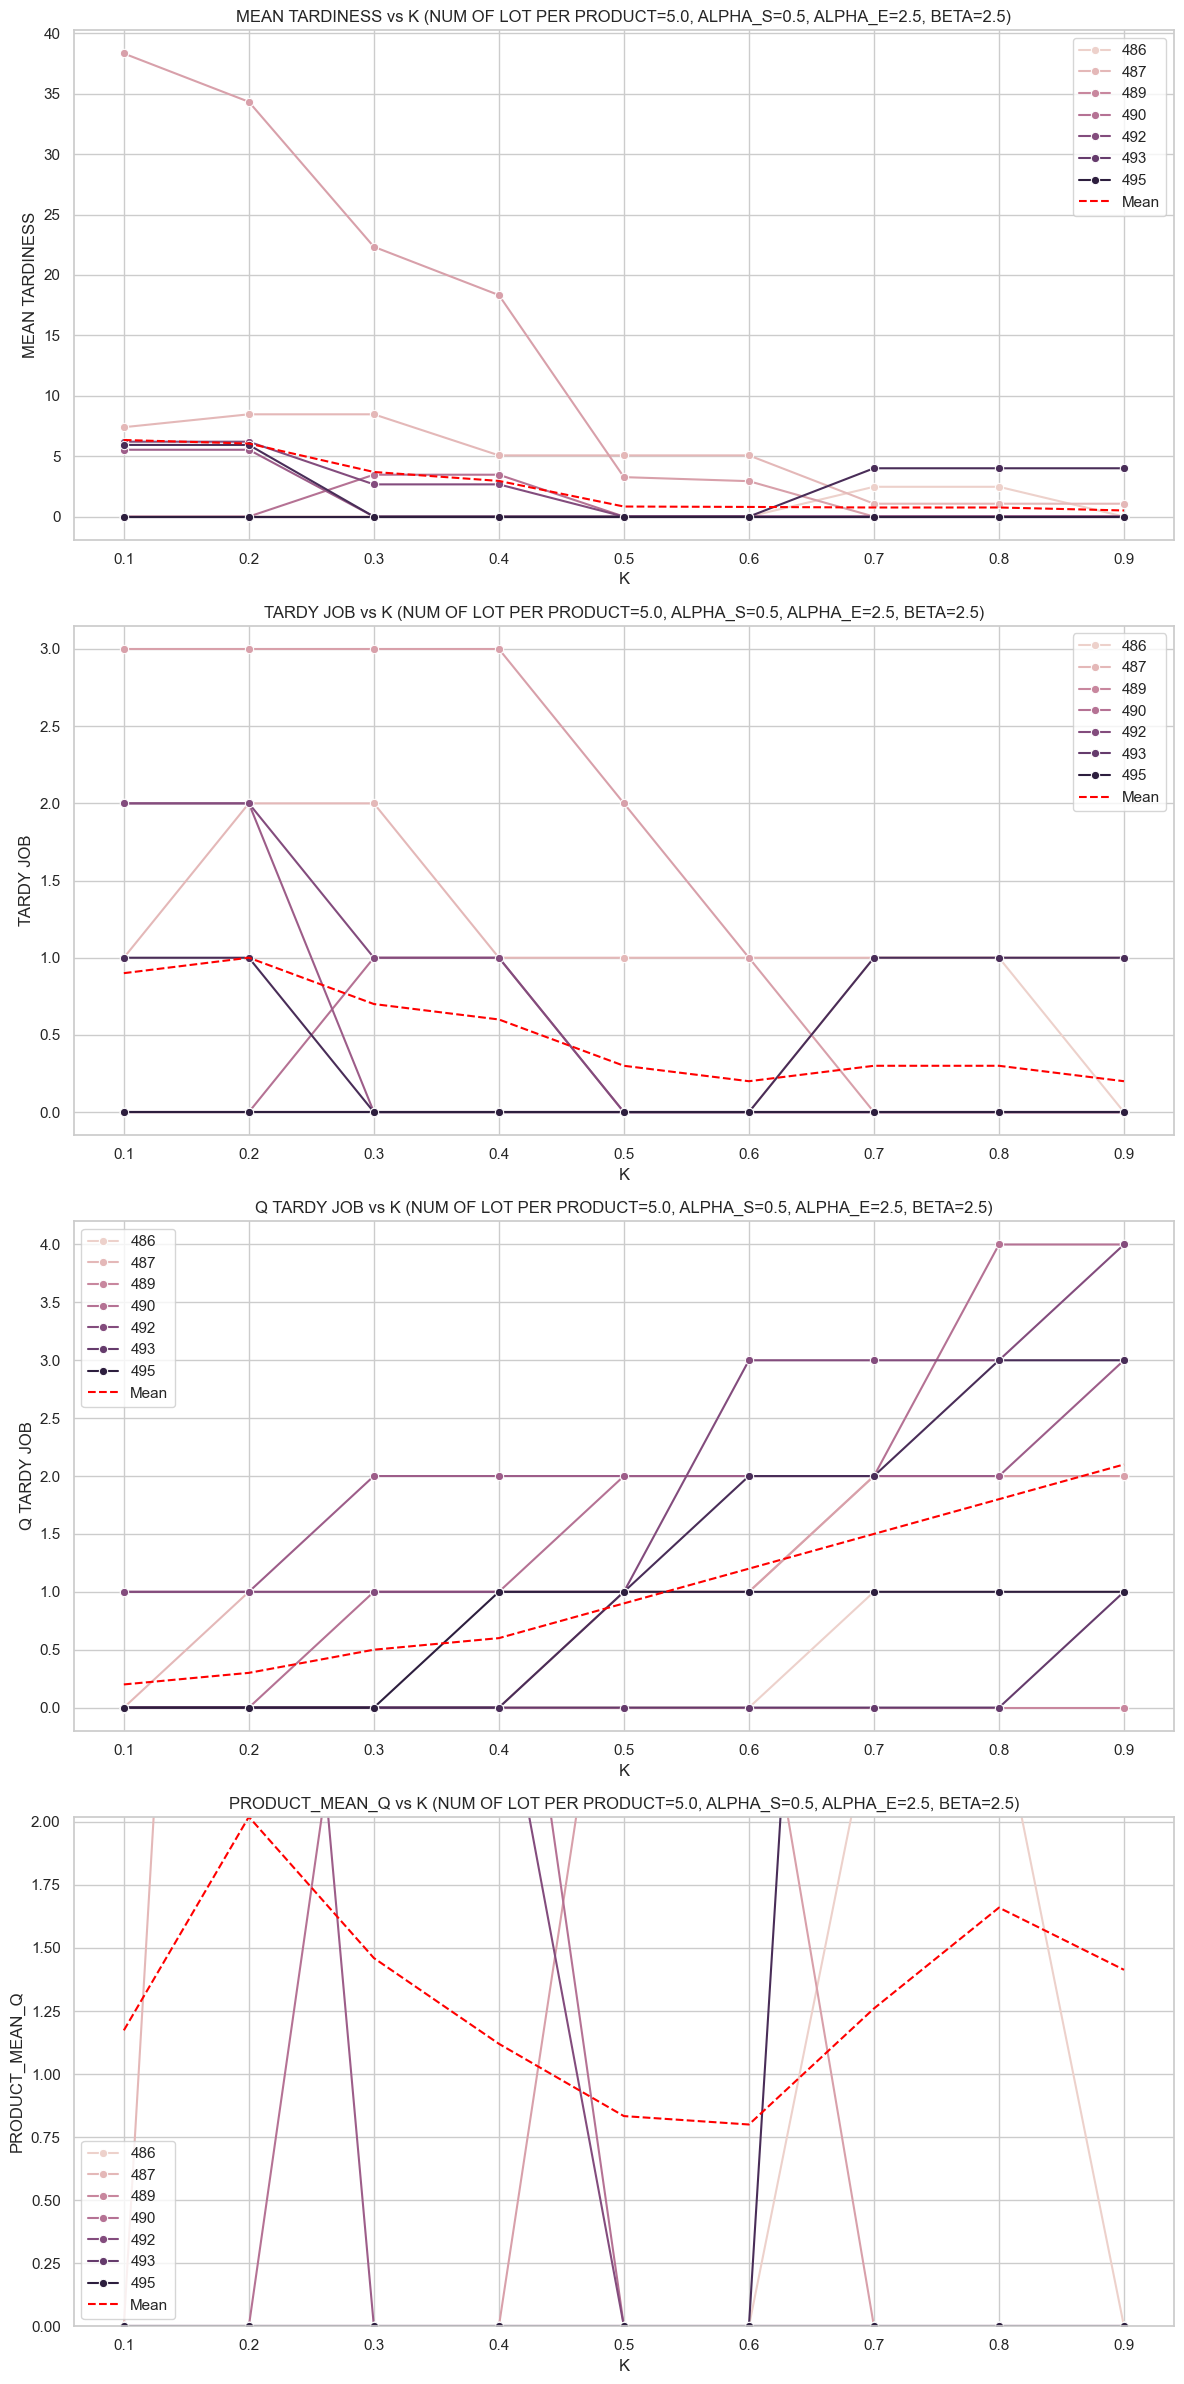

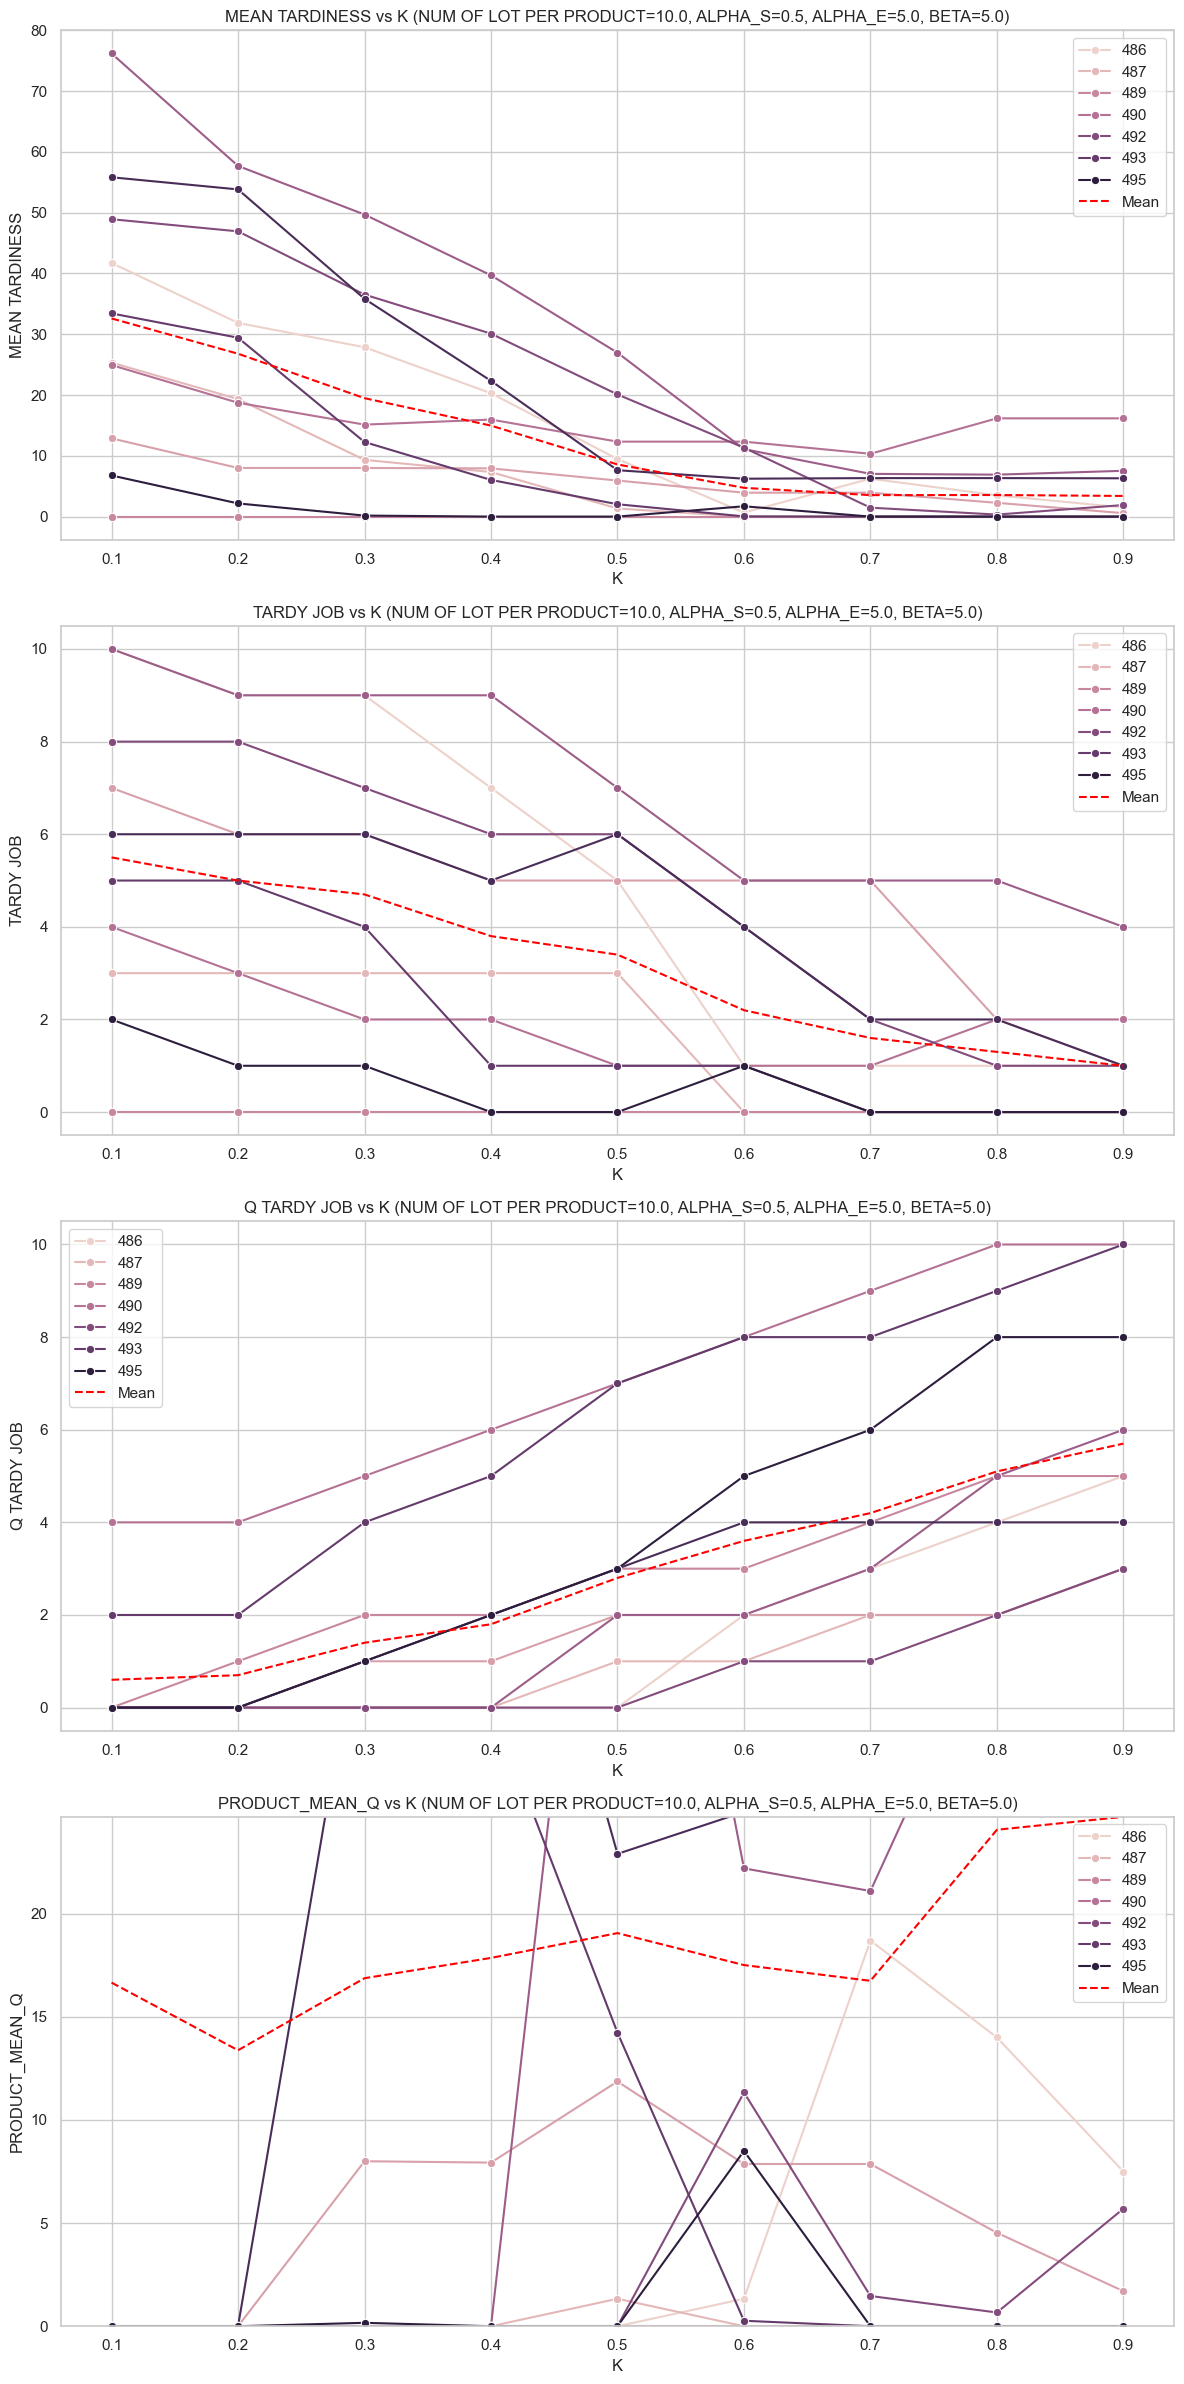

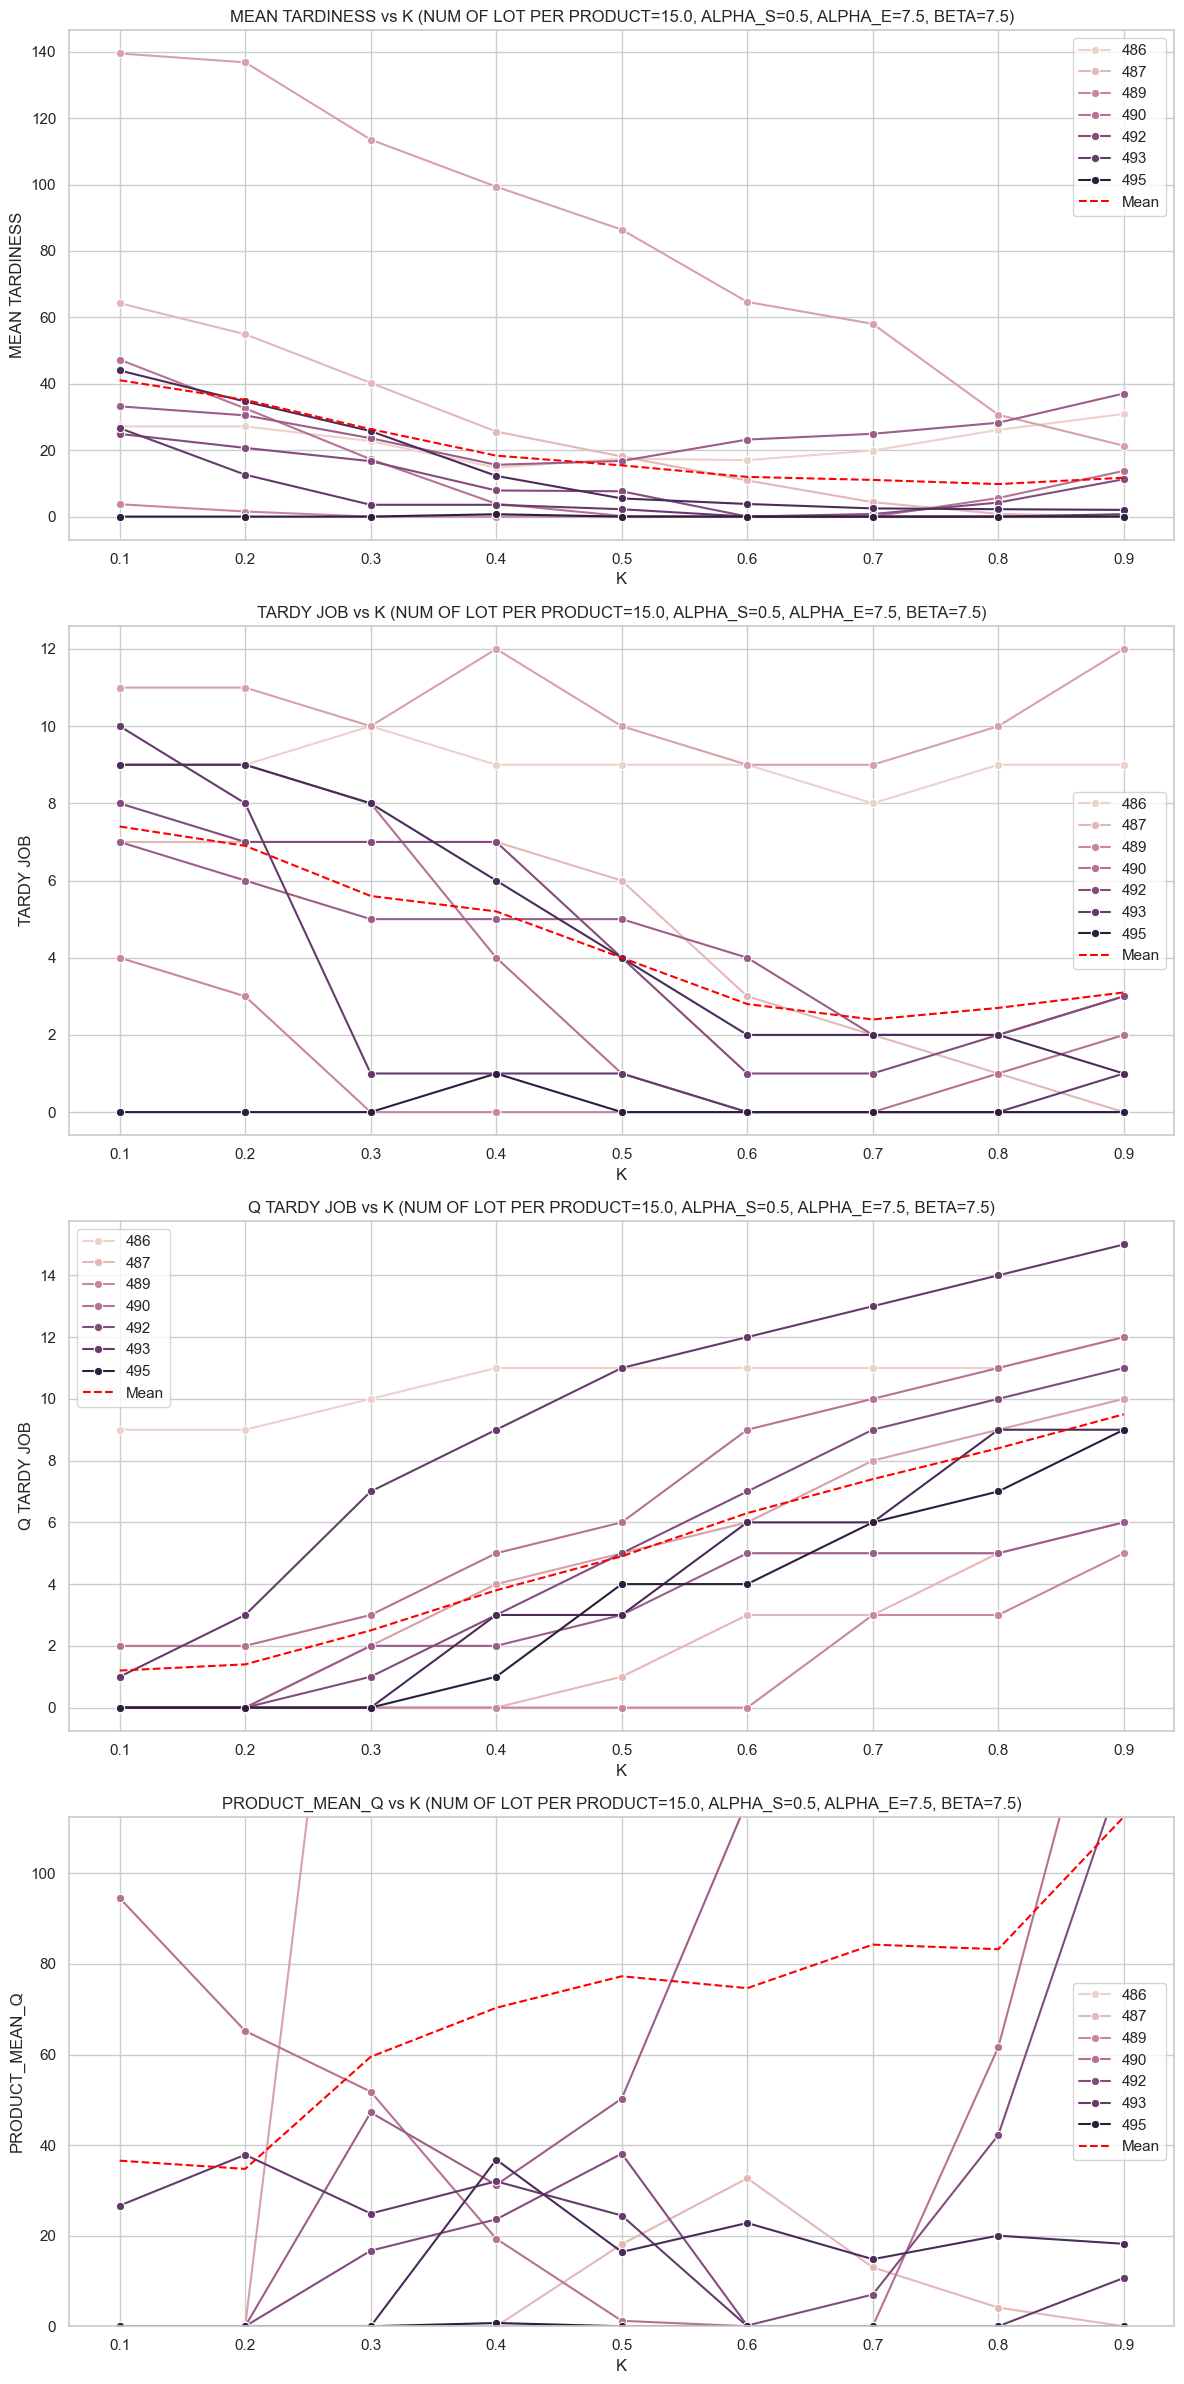

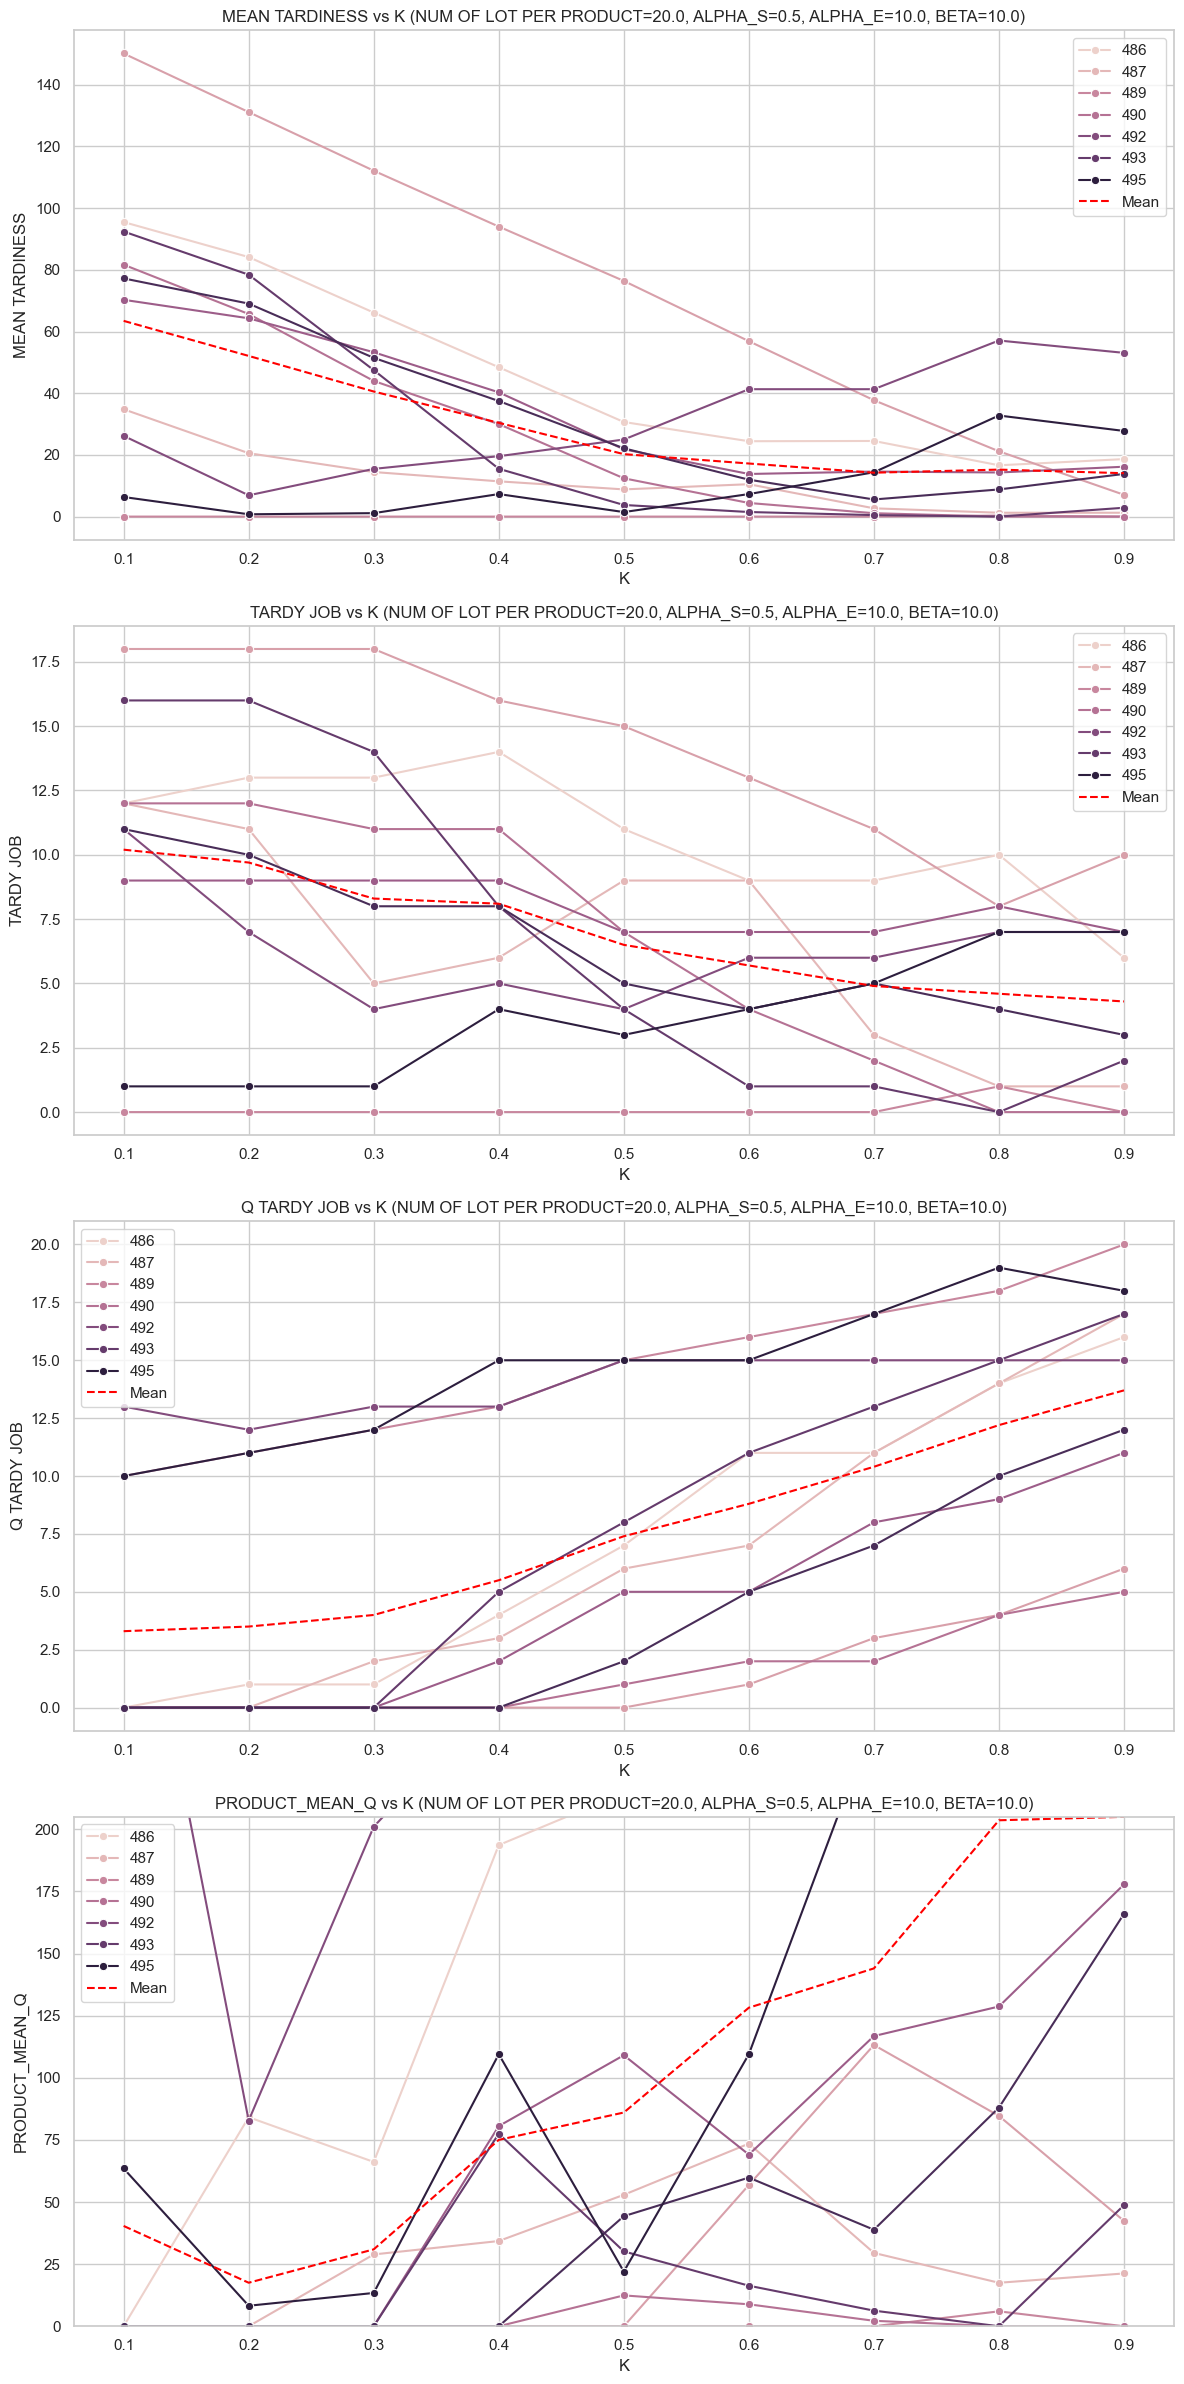

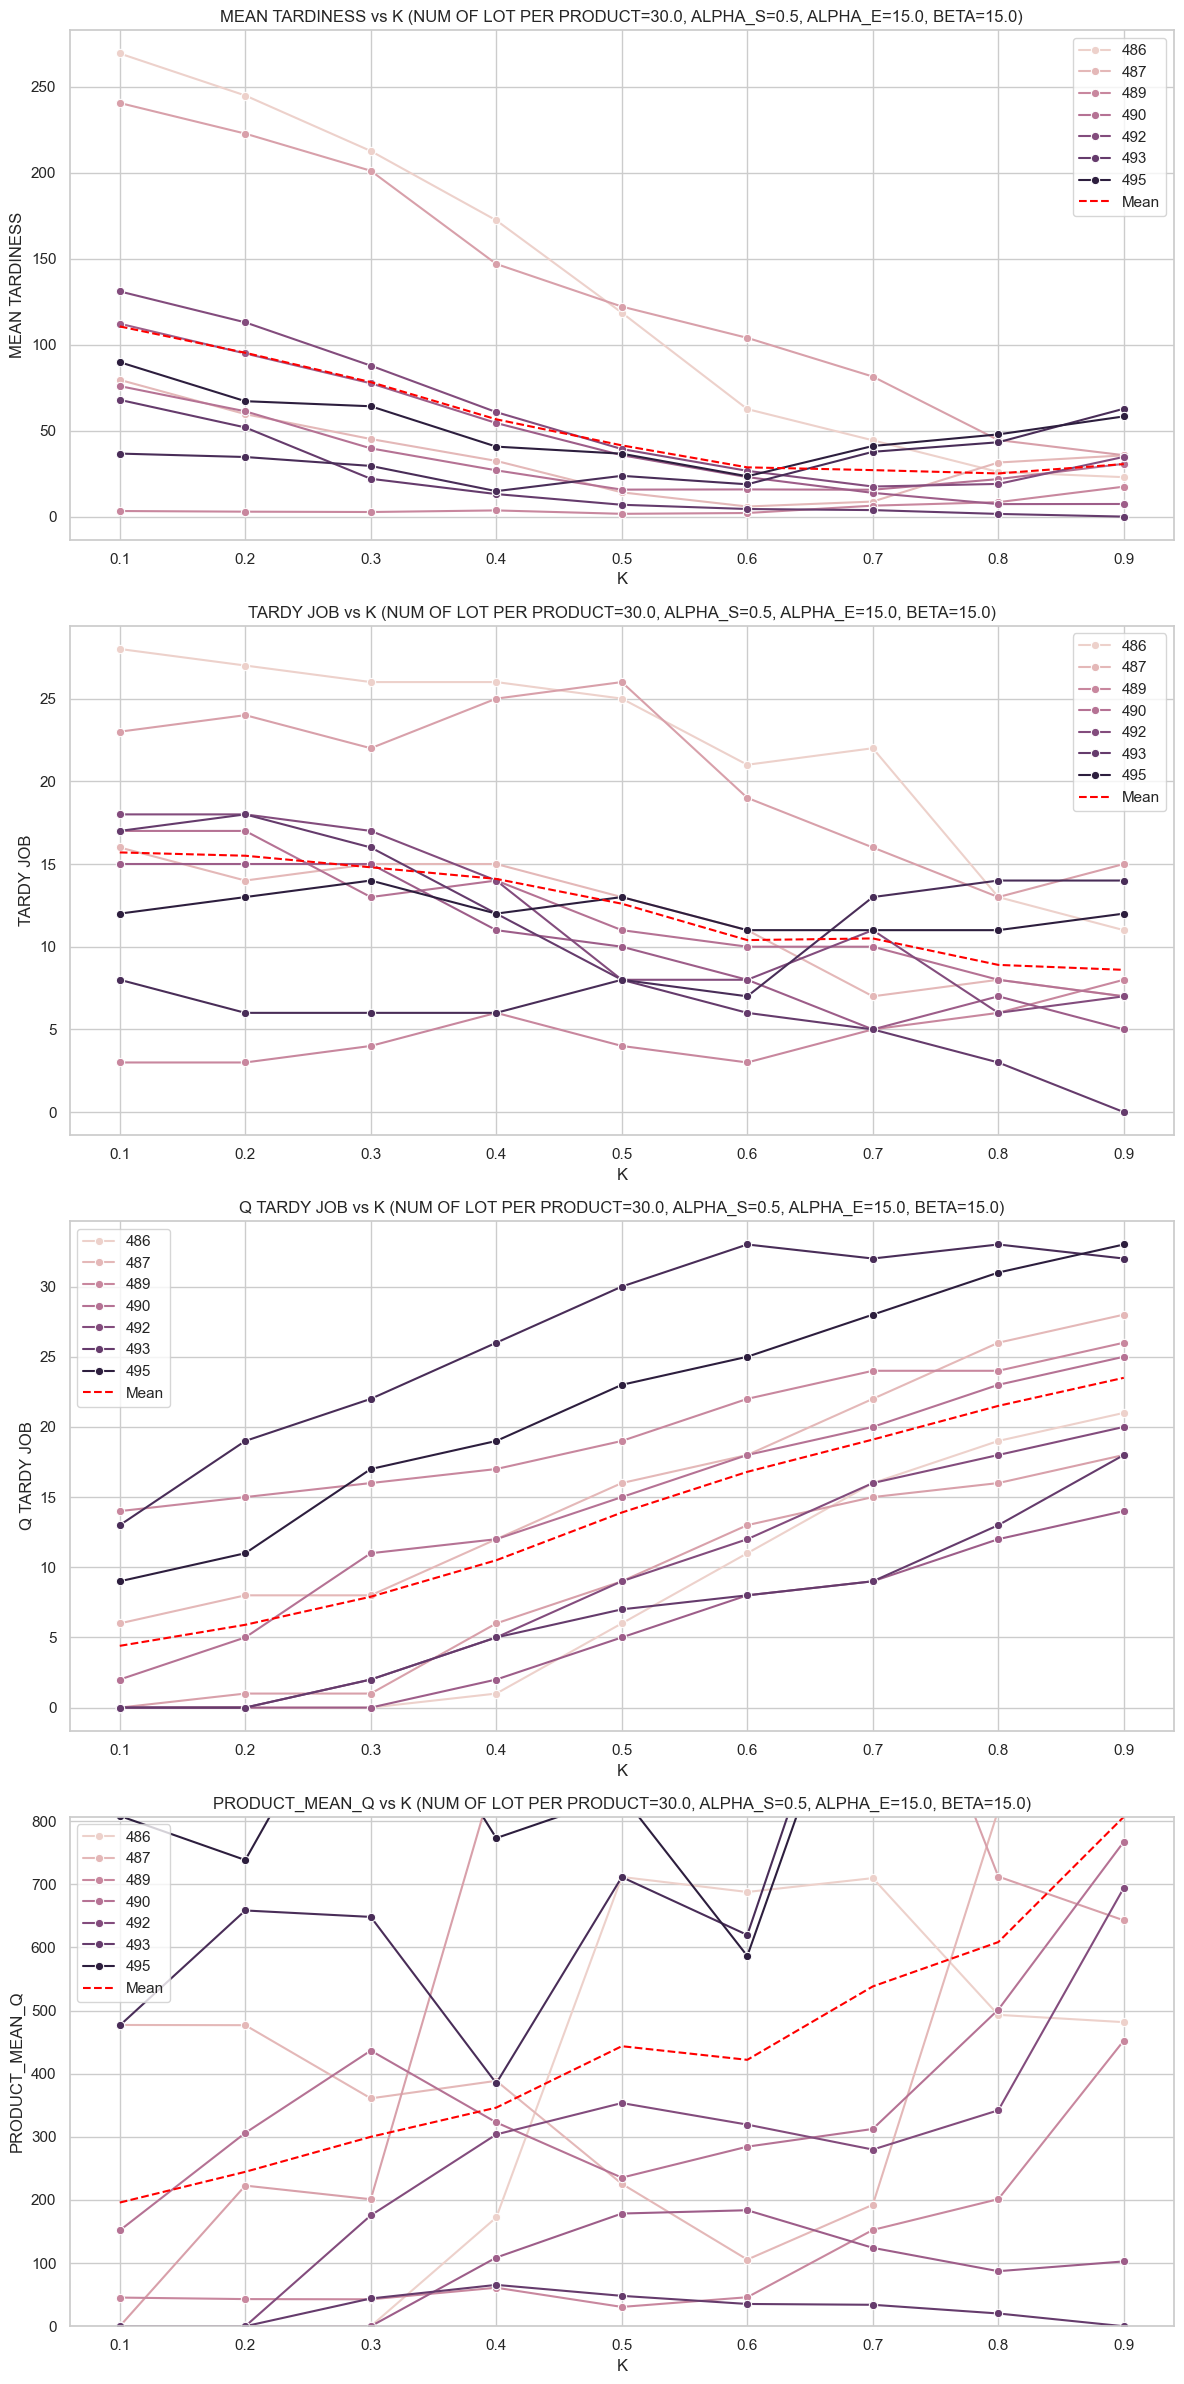

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./simulation_results-2024-06-06.csv")

# Create a new column for the product of Mean Tardiness and Q Tardy Job
df['PRODUCT_MEAN_Q'] = df['MEAN TARDINESS'] * df['Q TARDY JOB']

# Set the style of the visualization
sns.set(style="whitegrid")

# Unique problem types based on NUM OF LOT PER PRODUCT, ALPHA_S, ALPHA_E, and BETA
unique_problem_types = df[['NUM OF LOT PER PRODUCT', 'ALPHA_S', 'ALPHA_E', 'BETA']].drop_duplicates()

# Plotting for each problem type in separate figures
for _, problem in unique_problem_types.iterrows():
    problem_df = df[(df['NUM OF LOT PER PRODUCT'] == problem['NUM OF LOT PER PRODUCT']) & 
                    (df['ALPHA_S'] == problem['ALPHA_S']) & 
                    (df['ALPHA_E'] == problem['ALPHA_E']) & 
                    (df['BETA'] == problem['BETA'])]
    
    fig, axs = plt.subplots(4, 1, figsize=(12, 24))

    metrics = ['MEAN TARDINESS', 'TARDY JOB', 'Q TARDY JOB', 'PRODUCT_MEAN_Q']
    for i, metric in enumerate(metrics):
        sns.lineplot(
            data=problem_df, 
            x='K', 
            y=metric, 
            hue='SEED', 
            ax=axs[i], 
            marker='o'
        )
        
        mean_df = problem_df.groupby('K')[metric].mean().reset_index()
        sns.lineplot(
            data=mean_df, 
            x='K', 
            y=metric, 
            ax=axs[i], 
            color='red', 
            linestyle='--',
            label='Mean'
        )
        
        axs[i].set_title(f'{metric} vs K (NUM OF LOT PER PRODUCT={problem["NUM OF LOT PER PRODUCT"]}, ALPHA_S={problem["ALPHA_S"]}, ALPHA_E={problem["ALPHA_E"]}, BETA={problem["BETA"]})')
        axs[i].set_xlabel('K')
        axs[i].set_ylabel(metric)
        if metric == 'PRODUCT_MEAN_Q':
            axs[i].set_ylim(0, max(mean_df["PRODUCT_MEAN_Q"]))  # Adjusting the y-axis for PRODUCT_MEAN_Q

    # Adjust layout
    plt.tight_layout()
    plt.show()

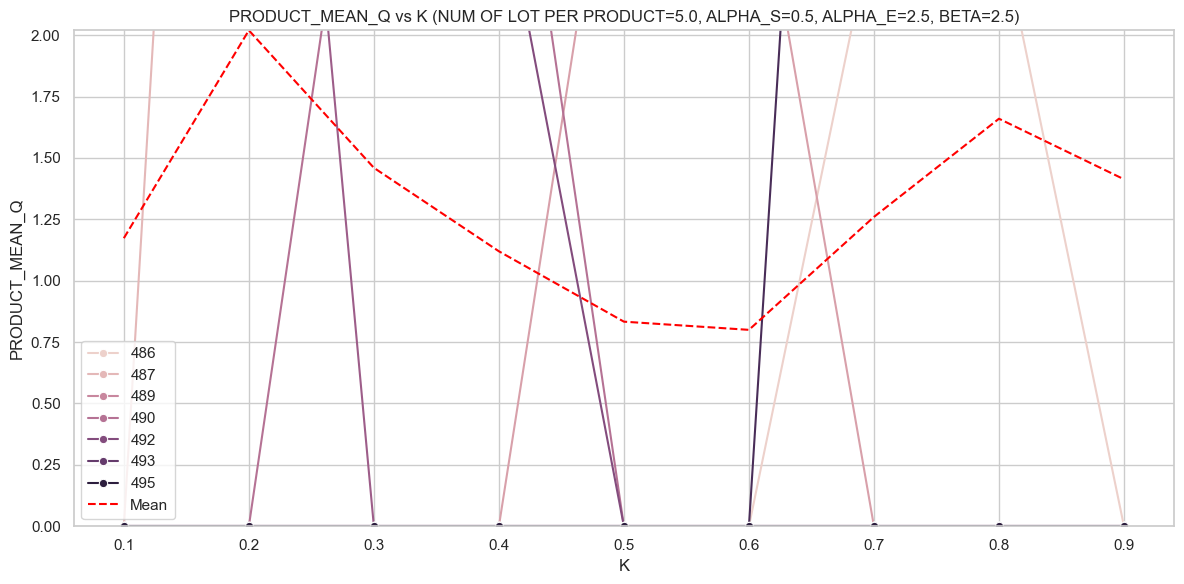

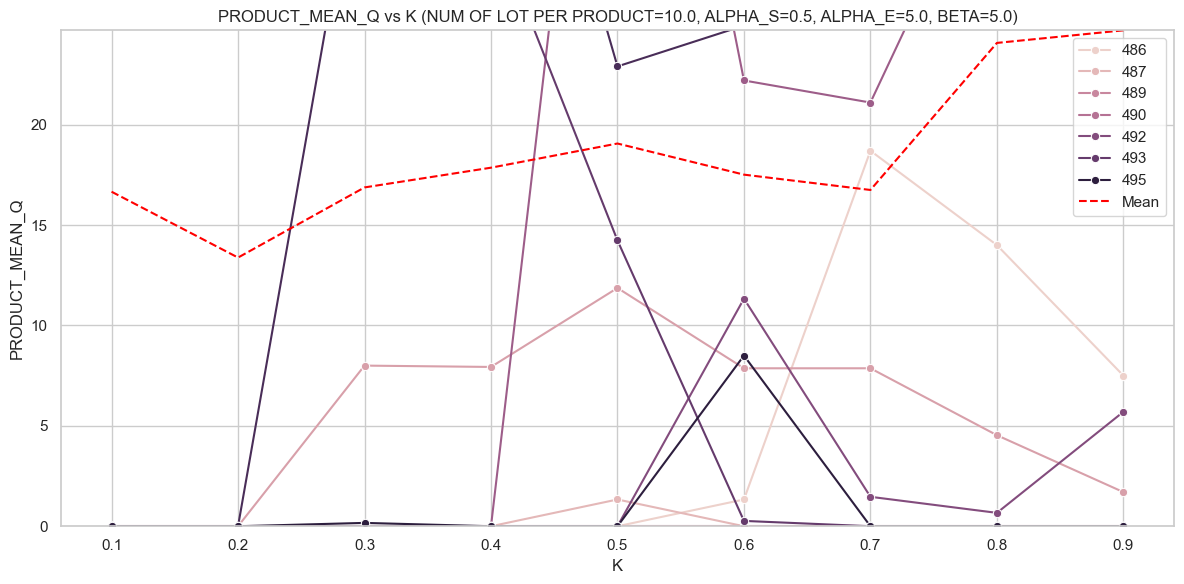

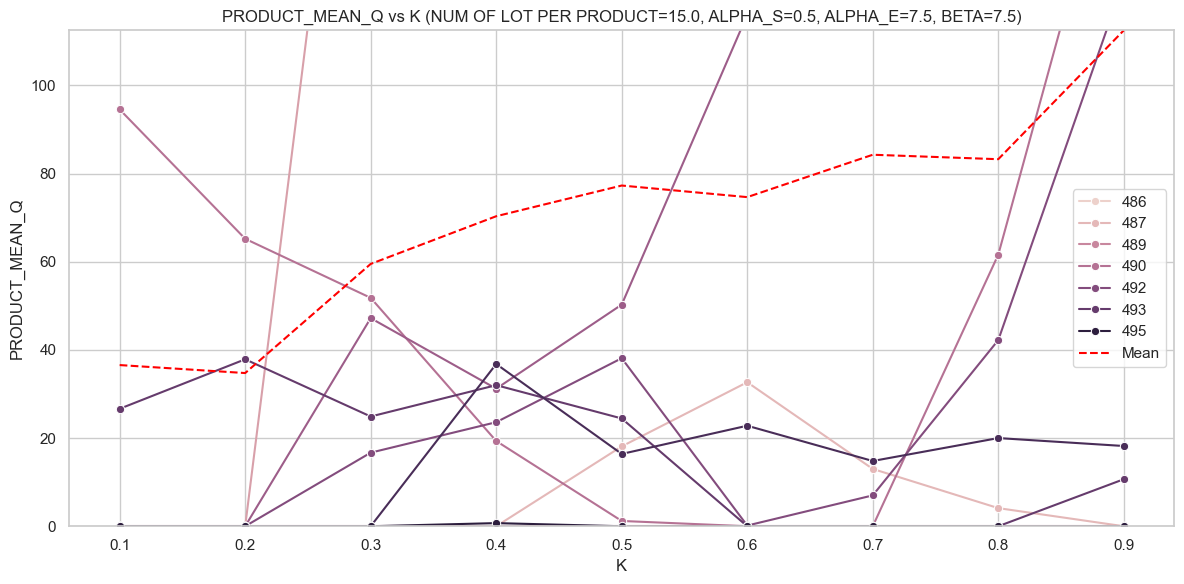

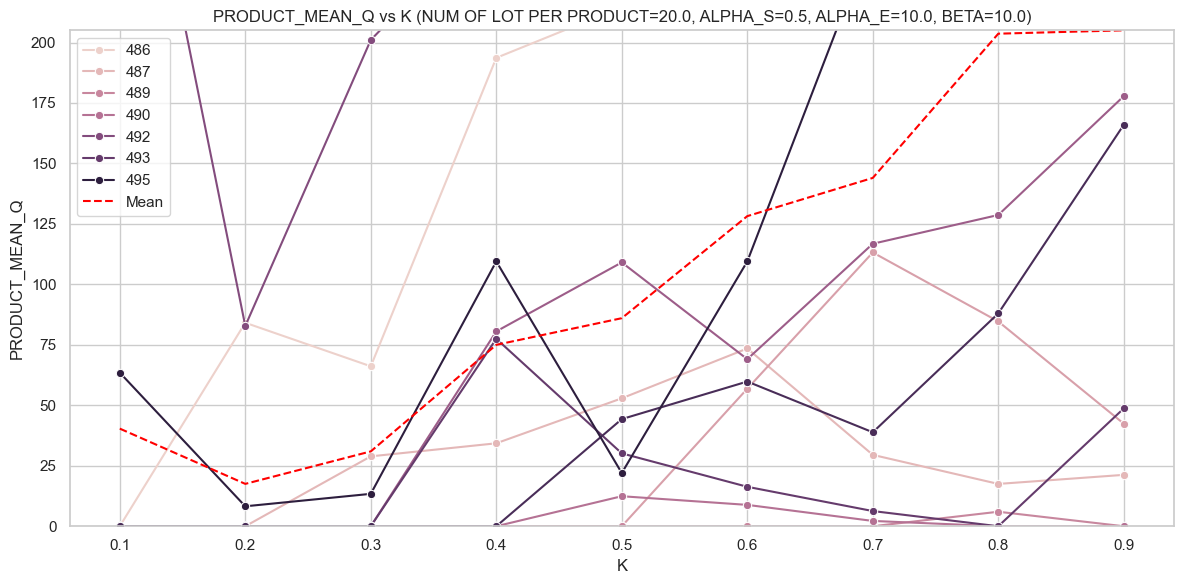

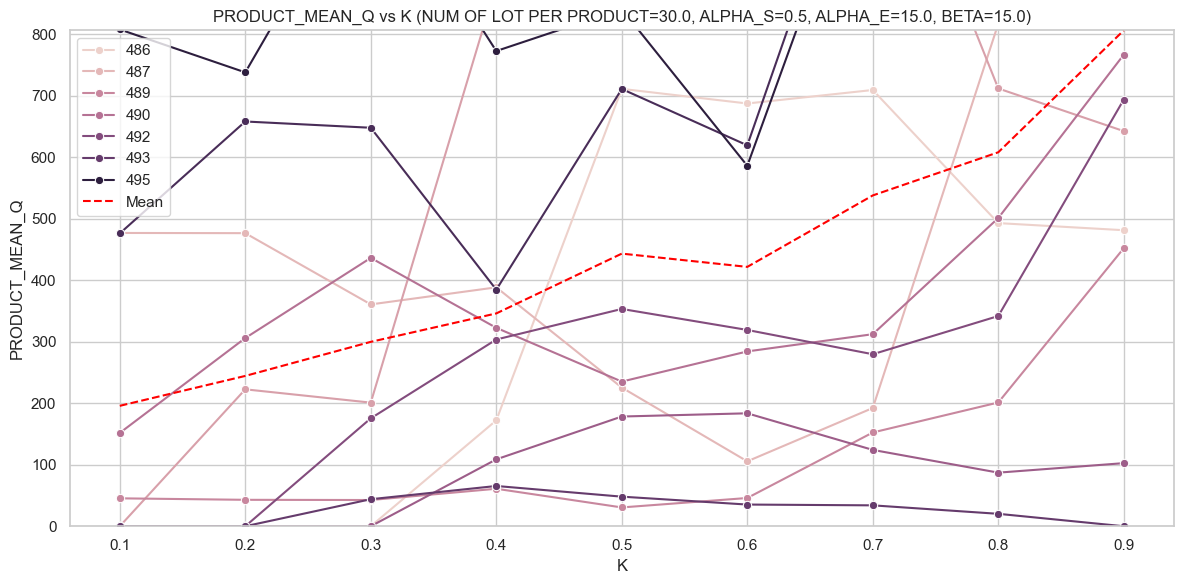

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./simulation_results-2024-06-06.csv")

# Create a new column for the product of Mean Tardiness and Q Tardy Job
df['PRODUCT_MEAN_Q'] = df['MEAN TARDINESS'] * df['Q TARDY JOB']

# Set the style of the visualization
sns.set(style="whitegrid")

# Unique problem types based on NUM OF LOT PER PRODUCT, ALPHA_S, ALPHA_E, and BETA
unique_problem_types = df[['NUM OF LOT PER PRODUCT', 'ALPHA_S', 'ALPHA_E', 'BETA']].drop_duplicates()


df['PRODUCT_MEAN_Q'] = df['MEAN TARDINESS'] * df['Q TARDY JOB']

# Set the style of the visualization
sns.set(style="whitegrid")

# Unique problem types based on NUM OF LOT PER PRODUCT, ALPHA_S, ALPHA_E, and BETA
unique_problem_types = df[['NUM OF LOT PER PRODUCT', 'ALPHA_S', 'ALPHA_E', 'BETA']].drop_duplicates()

# Plotting PRODUCT_MEAN_Q for each problem type in separate figures
for _, problem in unique_problem_types.iterrows():
    problem_df = df[(df['NUM OF LOT PER PRODUCT'] == problem['NUM OF LOT PER PRODUCT']) & 
                    (df['ALPHA_S'] == problem['ALPHA_S']) & 
                    (df['ALPHA_E'] == problem['ALPHA_E']) & 
                    (df['BETA'] == problem['BETA'])]
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=problem_df, 
        x='K', 
        y='PRODUCT_MEAN_Q', 
        hue='SEED', 
        marker='o'
    )
    
    # Calculate and plot the mean line
    mean_df = problem_df.groupby('K')['PRODUCT_MEAN_Q'].mean().reset_index()
    sns.lineplot(
        data=mean_df, 
        x='K', 
        y='PRODUCT_MEAN_Q', 
        color='red', 
        linestyle='--',
        label='Mean'
    )
    
    plt.title(f'PRODUCT_MEAN_Q vs K (NUM OF LOT PER PRODUCT={problem["NUM OF LOT PER PRODUCT"]}, ALPHA_S={problem["ALPHA_S"]}, ALPHA_E={problem["ALPHA_E"]}, BETA={problem["BETA"]})')
    plt.xlabel('K')
    plt.ylabel('PRODUCT_MEAN_Q')
    plt.ylim(0, max(mean_df["PRODUCT_MEAN_Q"]))  # Adjusting the y-axis for PRODUCT_MEAN_Q
    plt.tight_layout()
    plt.savefig(f"./prolem__{problem['NUM OF LOT PER PRODUCT']}_{problem['ALPHA_S']}_{problem['ALPHA_E']}_{problem['BETA']}-scale product mean q.png")
    plt.show()

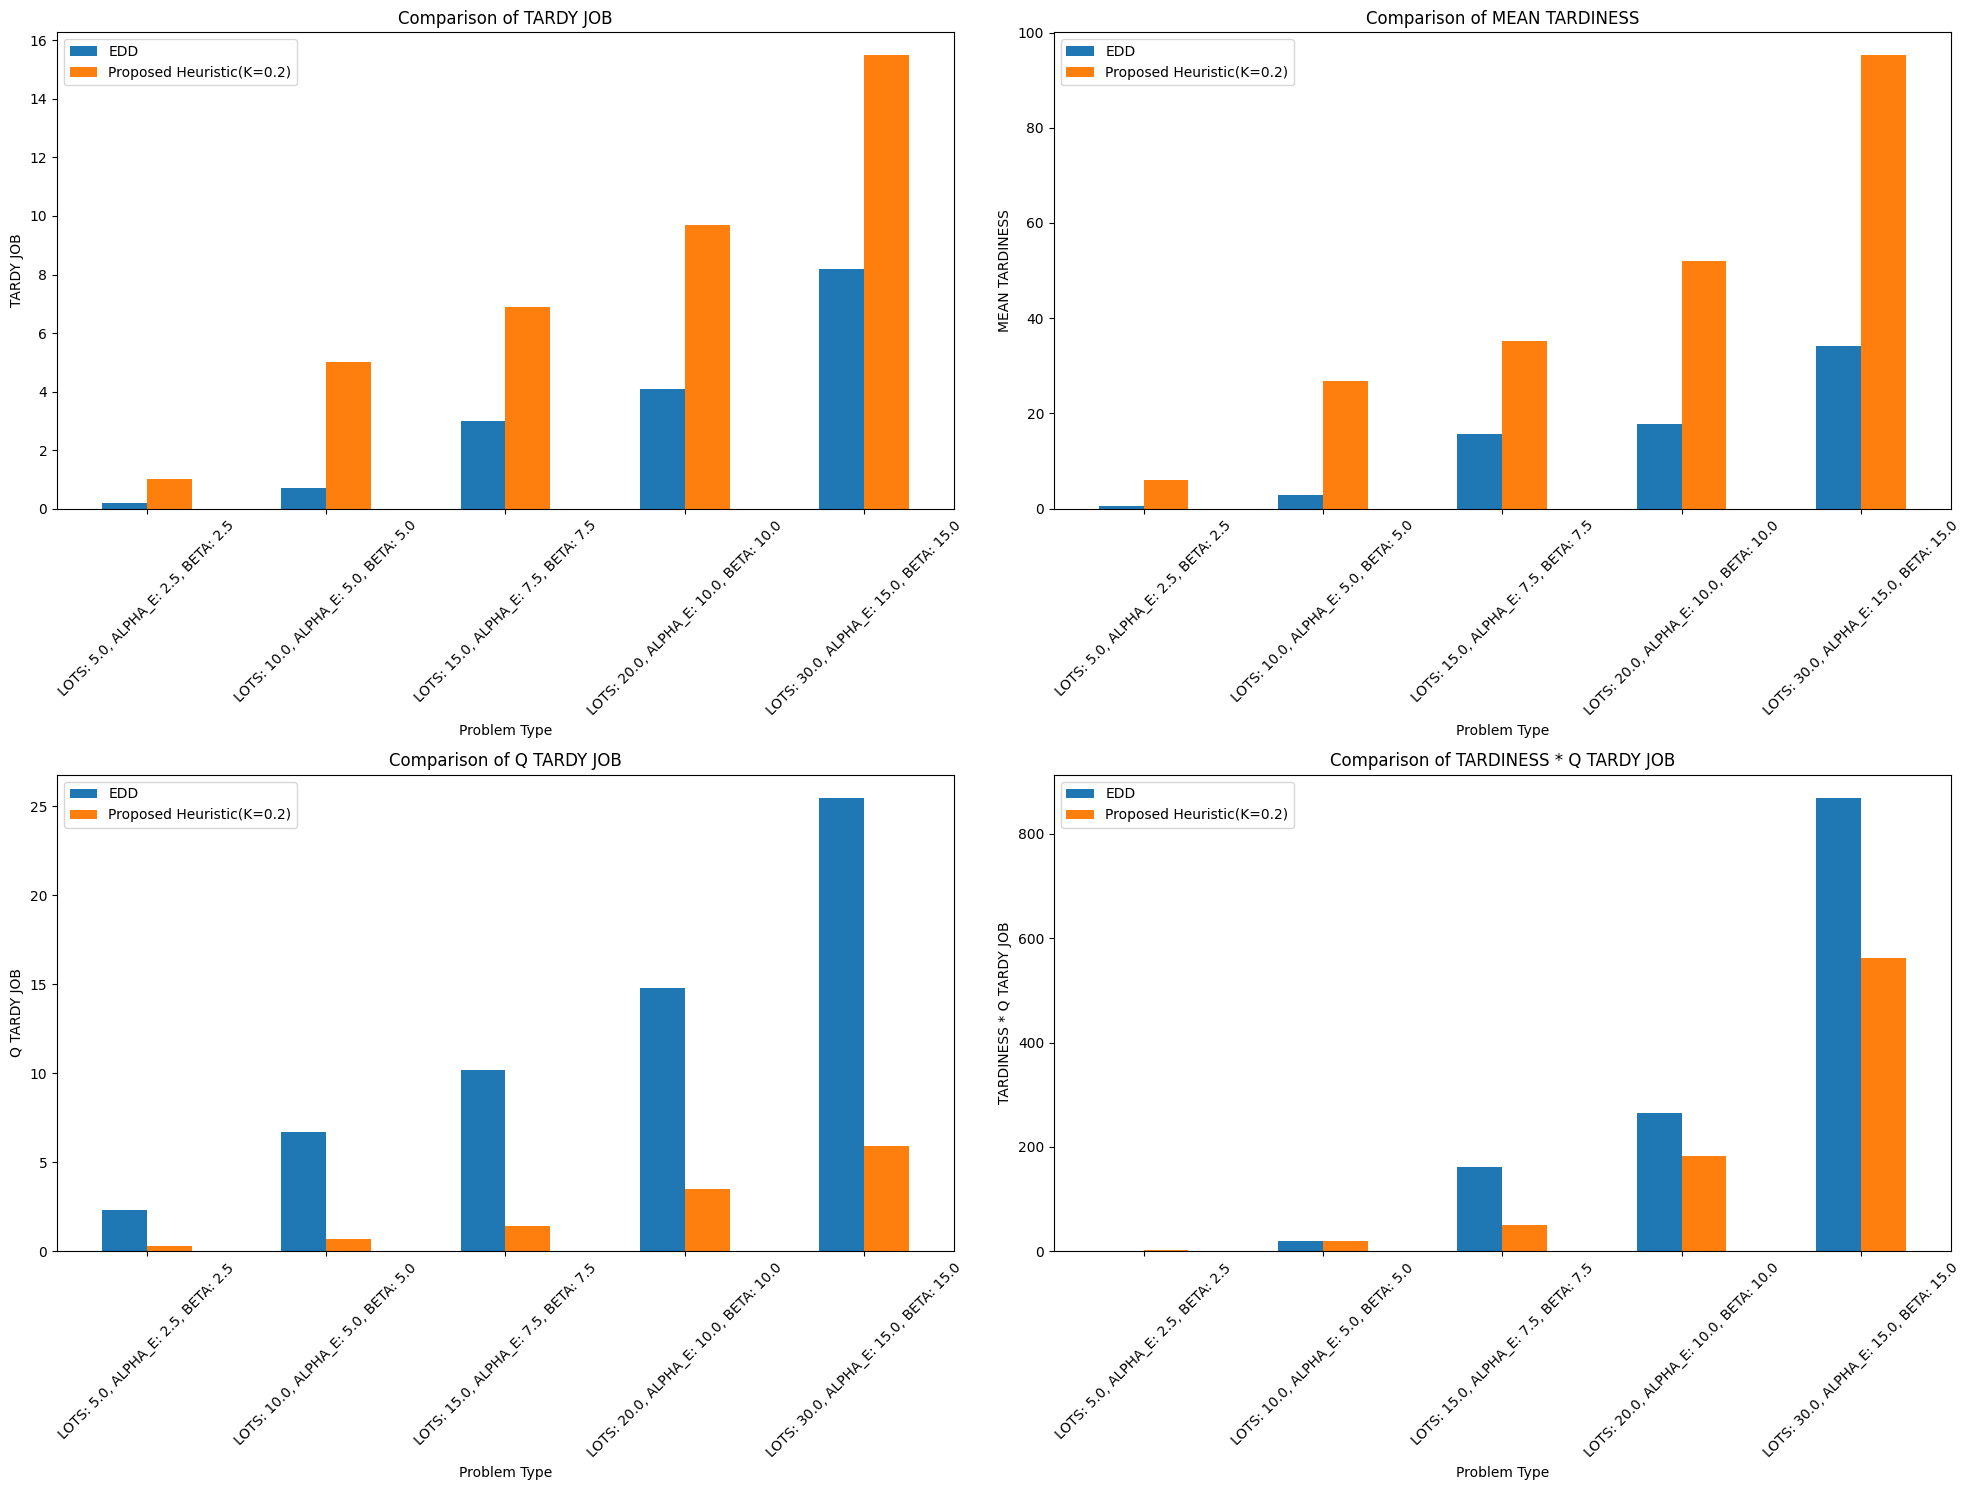

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
file1 = './simulation_results-EDD.csv'
file2 = './simulation_results-2024-06-06.csv'

data1 = pd.read_csv(file1)
data2 = pd.read_csv(file2)

# Step 1: Load the EDD data
edd_data = data1

# Step 2: Filter the non-EDD data with K=0.2
non_edd_data = data2[data2['K'] == 0.2]

# Ensure the correct grouping and calculation of mean values
# Group by the specified columns and calculate the mean for each metric
group_columns = ['NUM OF LOT PER PRODUCT', 'ALPHA_E', 'BETA']
new_edd_grouped_adjusted = edd_data.groupby(group_columns).agg({
    'TARDY JOB': 'mean',
    'MEAN TARDINESS': 'mean',
    'Q TARDY JOB': 'mean'
}).reset_index()

non_edd_k_02_grouped_adjusted = non_edd_data.groupby(group_columns).agg({
    'TARDY JOB': 'mean',
    'MEAN TARDINESS': 'mean',
    'Q TARDY JOB': 'mean'
}).reset_index()

# Calculate the product of MEAN TARDINESS and Q TARDY JOB for comparison
new_edd_grouped_adjusted['TARDINESS_Q_PRODUCT_EDD'] = new_edd_grouped_adjusted['MEAN TARDINESS'] * new_edd_grouped_adjusted['Q TARDY JOB']
non_edd_k_02_grouped_adjusted['TARDINESS_Q_PRODUCT_Non_EDD'] = non_edd_k_02_grouped_adjusted['MEAN TARDINESS'] * non_edd_k_02_grouped_adjusted['Q TARDY JOB']

# Merge the dataframes on the adjusted problem type columns
k_02_product_comparison_df_adjusted = new_edd_grouped_adjusted.merge(non_edd_k_02_grouped_adjusted, on=group_columns, suffixes=('_EDD', '_Non_EDD'))

# Create a new column to represent the problem type as a string
k_02_product_comparison_df_adjusted['PROBLEM_TYPE'] = k_02_product_comparison_df_adjusted.apply(
    lambda row: f"LOTS: {row['NUM OF LOT PER PRODUCT']}, ALPHA_E: {row['ALPHA_E']}, BETA: {row['BETA']}", axis=1)

# Set the problem type as the index
k_02_product_comparison_df_adjusted.set_index('PROBLEM_TYPE', inplace=True)

# Select relevant columns for comparison
comparison_columns = ['TARDY JOB_EDD', 'TARDY JOB_Non_EDD', 
                      'MEAN TARDINESS_EDD', 'MEAN TARDINESS_Non_EDD', 
                      'Q TARDY JOB_EDD', 'Q TARDY JOB_Non_EDD', 
                      'TARDINESS_Q_PRODUCT_EDD', 'TARDINESS_Q_PRODUCT_Non_EDD']

comparison_df = k_02_product_comparison_df_adjusted[comparison_columns]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

# Plot each comparison
comparison_df[['TARDY JOB_EDD', 'TARDY JOB_Non_EDD']].plot(kind='bar', ax=axes[0, 0], color=['#1f77b4', '#ff7f0e'])
axes[0, 0].set_title('Comparison of TARDY JOB')
axes[0, 0].set_xlabel('Problem Type')
axes[0, 0].set_ylabel('TARDY JOB')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].legend(['EDD', 'Proposed Heuristic(K=0.2)'])

comparison_df[['MEAN TARDINESS_EDD', 'MEAN TARDINESS_Non_EDD']].plot(kind='bar', ax=axes[0, 1], color=['#1f77b4', '#ff7f0e'])
axes[0, 1].set_title('Comparison of MEAN TARDINESS')
axes[0, 1].set_xlabel('Problem Type')
axes[0, 1].set_ylabel('MEAN TARDINESS')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend(['EDD', 'Proposed Heuristic(K=0.2)'])

comparison_df[['Q TARDY JOB_EDD', 'Q TARDY JOB_Non_EDD']].plot(kind='bar', ax=axes[1, 0], color=['#1f77b4', '#ff7f0e'])
axes[1, 0].set_title('Comparison of Q TARDY JOB')
axes[1, 0].set_xlabel('Problem Type')
axes[1, 0].set_ylabel('Q TARDY JOB')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend(['EDD', 'Proposed Heuristic(K=0.2)'])

comparison_df[['TARDINESS_Q_PRODUCT_EDD', 'TARDINESS_Q_PRODUCT_Non_EDD']].plot(kind='bar', ax=axes[1, 1], color=['#1f77b4', '#ff7f0e'])
axes[1, 1].set_title('Comparison of TARDINESS * Q TARDY JOB')
axes[1, 1].set_xlabel('Problem Type')
axes[1, 1].set_ylabel('TARDINESS * Q TARDY JOB')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(['EDD', 'Proposed Heuristic(K=0.2)'])

# Adjust layout
plt.tight_layout()
plt.savefig('edd-heuristic compare.png')
plt.show()
